In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## **Introduction**

**As per the problem statement the target columns are NFL,NFH, so i have constructed two different categories of algorithms (Time series Forecasting of NFH and NFL without scaling) and (Time series Forecasting of NFH and NFL with scaling), under each category there would be two different algorithms dependent model algorithm and independent model algorith**

**Dependent Model Algorithm(Pipeline Model): This model makes an assumption that NFH column is independent and hence makes the training/prediction followed by time forecasting , followed by which NFL column would be  training/prediction of features including NFH column followed by time series forecasting or in other words the NFL column training/prediction followed by time seriesforecasting would be dependent on NFH column and other columns.**


**Independent Model Algorithm: This model trains NFH column seperately and NFL column seperately  and makes time series forecasting i.e( In the dataset during NFH training/prediction followed by timeseries forecasting ,NFL column wont be present similarly in the dataset during training/prediction Similarly for training/prediction of NFL, NFH column wont be present during training/prediction and based on the training time series forecasting would be done.**


Note: 

1)The input width of the window and label length of the window would purely depend on the num_features(number of columns).

2)The current epochs count for both the models under this category would be 250 sir, if in case , if you feel like you want to increase the epoch count sir , kindly do mention the count under the compile function for both of the models seperately sir.

3)Sir due to the fact that i had constructed the algorithms in a more elaborate approach (step by step approach) , hence i have constructed the algorithms under **Time Series Forecasting of NFH and NFL with scaling** in a seperate notebook sir.

Link to the colab notebook consisting of **Time Series Forecasting of NFH and NFL with scaling** is given below sir
 
 https://colab.research.google.com/drive/1RfKKGVFcUsk0aUHNIYEArQfW6cDXLsKZ?usp=sharing

**References**

Link:https://www.tensorflow.org/tutorials/structured_data/time_series 

**Important Note: KIndly run the code cells in order so as to obtain accurate results sir**



# **Time Series Forecasting of NFH and NFL without scaling**

##**Data PreProcessing**

In [ ]:
def process(df):
  # input: unprocessed dataframe
  # output: processed dataframe
  df.reset_index(inplace=True)
  p=list(df.iloc[:,-1].values)
  #p.pop(0)
  df=df.drop(columns=['nfl_data']) # removing the header of dataframe
  df=df.rename(columns={"level_0":"Index","level_1":"Date(IST)","level_2":"NFO","level_3":"NFH","level_4":"NFL","level_5":"NFC","level_6":"FIIB","level_7":"FIIS","level_8":"FIIN","level_9":"DIIB","level_10":"DIIS","level_11":"DIIN","level_12":"August","level_13":"December","level_14":"CAD","level_15":"DAD","level_16":"DOD","level_17":"NDAD","level_18":"Currey","level_19":"Flow","level_20":"Shine"})
  df['Vega']=p
  df=df.drop(0)
  #print(df.columns)
  df=df.drop(columns=['Index'])
  df=df.dropna(how='any')
  date_time = pd.to_datetime(df.pop('Date(IST)'), format='%Y-%m-%d %H:%M:%S')
  df['NFO']=pd.to_numeric(df['NFO']).astype('float64')
  df['NFH']=pd.to_numeric(df['NFH']).astype('float64')
  df['NFL']=pd.to_numeric(df['NFL']).astype('float64')
  df['NFC']=pd.to_numeric(df['NFC']).astype('float64')
  df['FIIB']=pd.to_numeric(df['FIIB']).astype('float64')
  df['FIIS']=pd.to_numeric(df['FIIS']).astype('float64')
  df['FIIN']=pd.to_numeric(df['FIIN']).astype('float64')
  df['DIIB']=pd.to_numeric(df['DIIB']).astype('float64')
  df['DIIS']=pd.to_numeric(df['DIIS']).astype('float64')
  df['August']=pd.to_numeric(df['August']).astype('float64')
  df['December']=pd.to_numeric(df['December']).astype('float64')
  df['CAD']=pd.to_numeric(df['CAD']).astype('float64')
  df['DAD']=pd.to_numeric(df['DAD']).astype('float64')
  df['DOD']=pd.to_numeric(df['DOD']).astype('float64')
  df['NDAD']=pd.to_numeric(df['NDAD']).astype('float64')
  df['Flow']=pd.to_numeric(df['Flow']).astype('float64')
  df['Currey']=pd.to_numeric(df['Currey']).astype('float64')
  df['Shine']=pd.to_numeric(df['Shine']).astype('float64')
  df['Vega']=pd.to_numeric(df['Vega']).astype('float64')
  #df = df[5::6]
  return df,date_time

In [ ]:
df=pd.read_csv('csv_nfl_data.csv')
df,date_time=process(df)
df

,NFO,NFH,NFL,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega
1,12115.673242,12177.119957,12151.571552,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999
2,12195.406448,12275.487382,12173.355954,12251.196928,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.2,879.0,973.0,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000
3,12272.929018,12299.127043,12181.887534,12228.903255,3732.00,3835.84,-103.84,3778.78,3802.48,-23.7,360.0,1502.0,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000
4,12237.309351,12242.227141,12030.371144,12051.960005,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000
5,12149.137851,12192.474725,11985.555622,12017.343536,4109.04,4624.89,-515.85,5162.02,4413.62,748.4,725.0,1109.0,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,15832.780716,15871.734957,15673.598435,15711.203010,7094.36,9985.30,-2890.94,5377.76,4239.00,1138.76,783.0,1186.0,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999
353,15781.799179,15846.875708,15703.024907,15763.679655,6766.31,7445.15,-678.84,6844.01,5011.25,1832.76,1070.0,902.0,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000
354,15829.576703,15869.452759,15764.937429,15838.276361,4275.71,5934.43,-1658.72,5634.19,4357.11,1277.08,1069.0,940.0,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000
355,15904.676773,15910.968841,15804.933350,15837.898386,10932.02,10815.39,116.63,8687.31,6877.26,1810.05,903.0,1084.0,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000


In [ ]:
df.head()

,NFO,NFH,NFL,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega
1,12115.673242,12177.119957,12151.571552,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.397,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999
2,12195.406448,12275.487382,12173.355954,12251.196928,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.2,879.0,973.0,-0.23,-0.510,-1.33,0.46,0.4430,0.5648,0.08,1.550000
3,12272.929018,12299.127043,12181.887534,12228.903255,3732.00,3835.84,-103.84,3778.78,3802.48,-23.7,360.0,1502.0,-0.17,0.015,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000
4,12237.309351,12242.227141,12030.371144,12051.960005,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.050,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000
5,12149.137851,12192.474725,11985.555622,12017.343536,4109.04,4624.89,-515.85,5162.02,4413.62,748.4,725.0,1109.0,0.56,0.305,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000


## **Data Visualization**

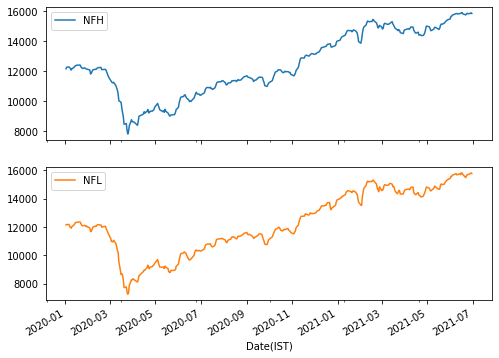

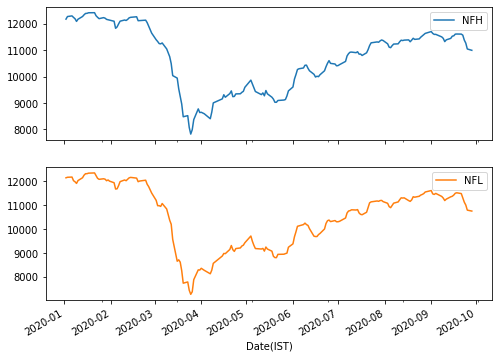

In [ ]:
plot_cols = ['NFH', 'NFL']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)
plot_features = df[plot_cols][:177]
plot_features.index = date_time[:177]
_ = plot_features.plot(subplots=True)

### **Data Description**

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NFO,355.0,12392.743851,2152.304776,7471.891708,10988.451423,12095.398276,14557.310080,15904.676773
NFH,355.0,12472.301870,2131.192420,7819.610704,11071.452300,12121.683483,14698.970930,15921.677431
NFL,355.0,12280.436920,2163.640851,7264.768634,10899.791747,11990.374901,14444.825602,15814.822034
NFC,355.0,12379.724504,2150.859412,7512.951040,10993.729871,12058.276607,14573.408730,15895.376149
FIIB,355.0,7683.328310,5424.960365,2489.450000,5216.655000,6534.990000,8496.545000,74741.850000
FIIS,355.0,7412.260761,4868.765079,1982.020000,5145.015000,6361.430000,8100.990000,67028.870000
FIIN,355.0,271.067465,2773.656749,-8295.170000,-1004.570000,146.220000,1173.350000,28739.170000
DIIB,355.0,4715.090310,1557.269879,1960.270000,3694.195000,4342.900000,5314.830000,13264.470000
DIIS,355.0,4790.458676,1285.901838,2062.950000,3915.445000,4601.270000,5578.765000,9844.670000
August,355.0,979.898592,592.413522,107.000000,762.500000,996.000000,1156.500000,10680.000000


### **Data Visualization using Time Stamp Analysis (Daily and yearly)**

In [ ]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [ ]:
timestamp_s

1      1.577923e+09
2      1.578010e+09
3      1.578269e+09
4      1.578355e+09
5      1.578442e+09
           ...     
352    1.624493e+09
353    1.624579e+09
354    1.624838e+09
355    1.624925e+09
356    1.625011e+09
Name: Date(IST), Length: 355, dtype: float64

In [ ]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day)).astype('float64')
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day)).astype('float64')
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year)).astype('float64')
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year)).astype('float64')
df['nfh']=df['NFH']
df['nfl']=df['NFL']
df=df.drop(columns=['NFH','NFL'])

In [ ]:
df

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,nfh,nfl
1,12115.673242,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,-3.371804e-12,1.0,0.015052,0.999887,12177.119957,12151.571552
2,12195.406448,12251.196928,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.2,879.0,973.0,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,9.267350e-13,1.0,0.032250,0.999480,12275.487382,12173.355954
3,12272.929018,12228.903255,3732.00,3835.84,-103.84,3778.78,3802.48,-23.7,360.0,1502.0,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,-7.295644e-13,1.0,0.083765,0.996486,12299.127043,12181.887534
4,12237.309351,12051.960005,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,-1.098294e-11,1.0,0.100894,0.994897,12242.227141,12030.371144
5,12149.137851,12017.343536,4109.04,4624.89,-515.85,5162.02,4413.62,748.4,725.0,1109.0,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,-6.684402e-12,1.0,0.117994,0.993014,12192.474725,11985.555622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,15832.780716,15711.203010,7094.36,9985.30,-2890.94,5377.76,4239.00,1138.76,783.0,1186.0,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,-2.140077e-13,1.0,0.136996,-0.990572,15871.734957,15673.598435
353,15781.799179,15763.679655,6766.31,7445.15,-678.84,6844.01,5011.25,1832.76,1070.0,902.0,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000,-1.046738e-11,1.0,0.119936,-0.992782,15846.875708,15703.024907
354,15829.576703,15838.276361,4275.71,5934.43,-1658.72,5634.19,4357.11,1277.08,1069.0,940.0,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000,-1.212368e-11,1.0,0.068564,-0.997647,15869.452759,15764.937429
355,15904.676773,15837.898386,10932.02,10815.39,116.63,8687.31,6877.26,1810.05,903.0,1084.0,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,-7.825145e-12,1.0,0.051392,-0.998679,15910.968841,15804.933350


### **Data Visualization on a Day Basis**

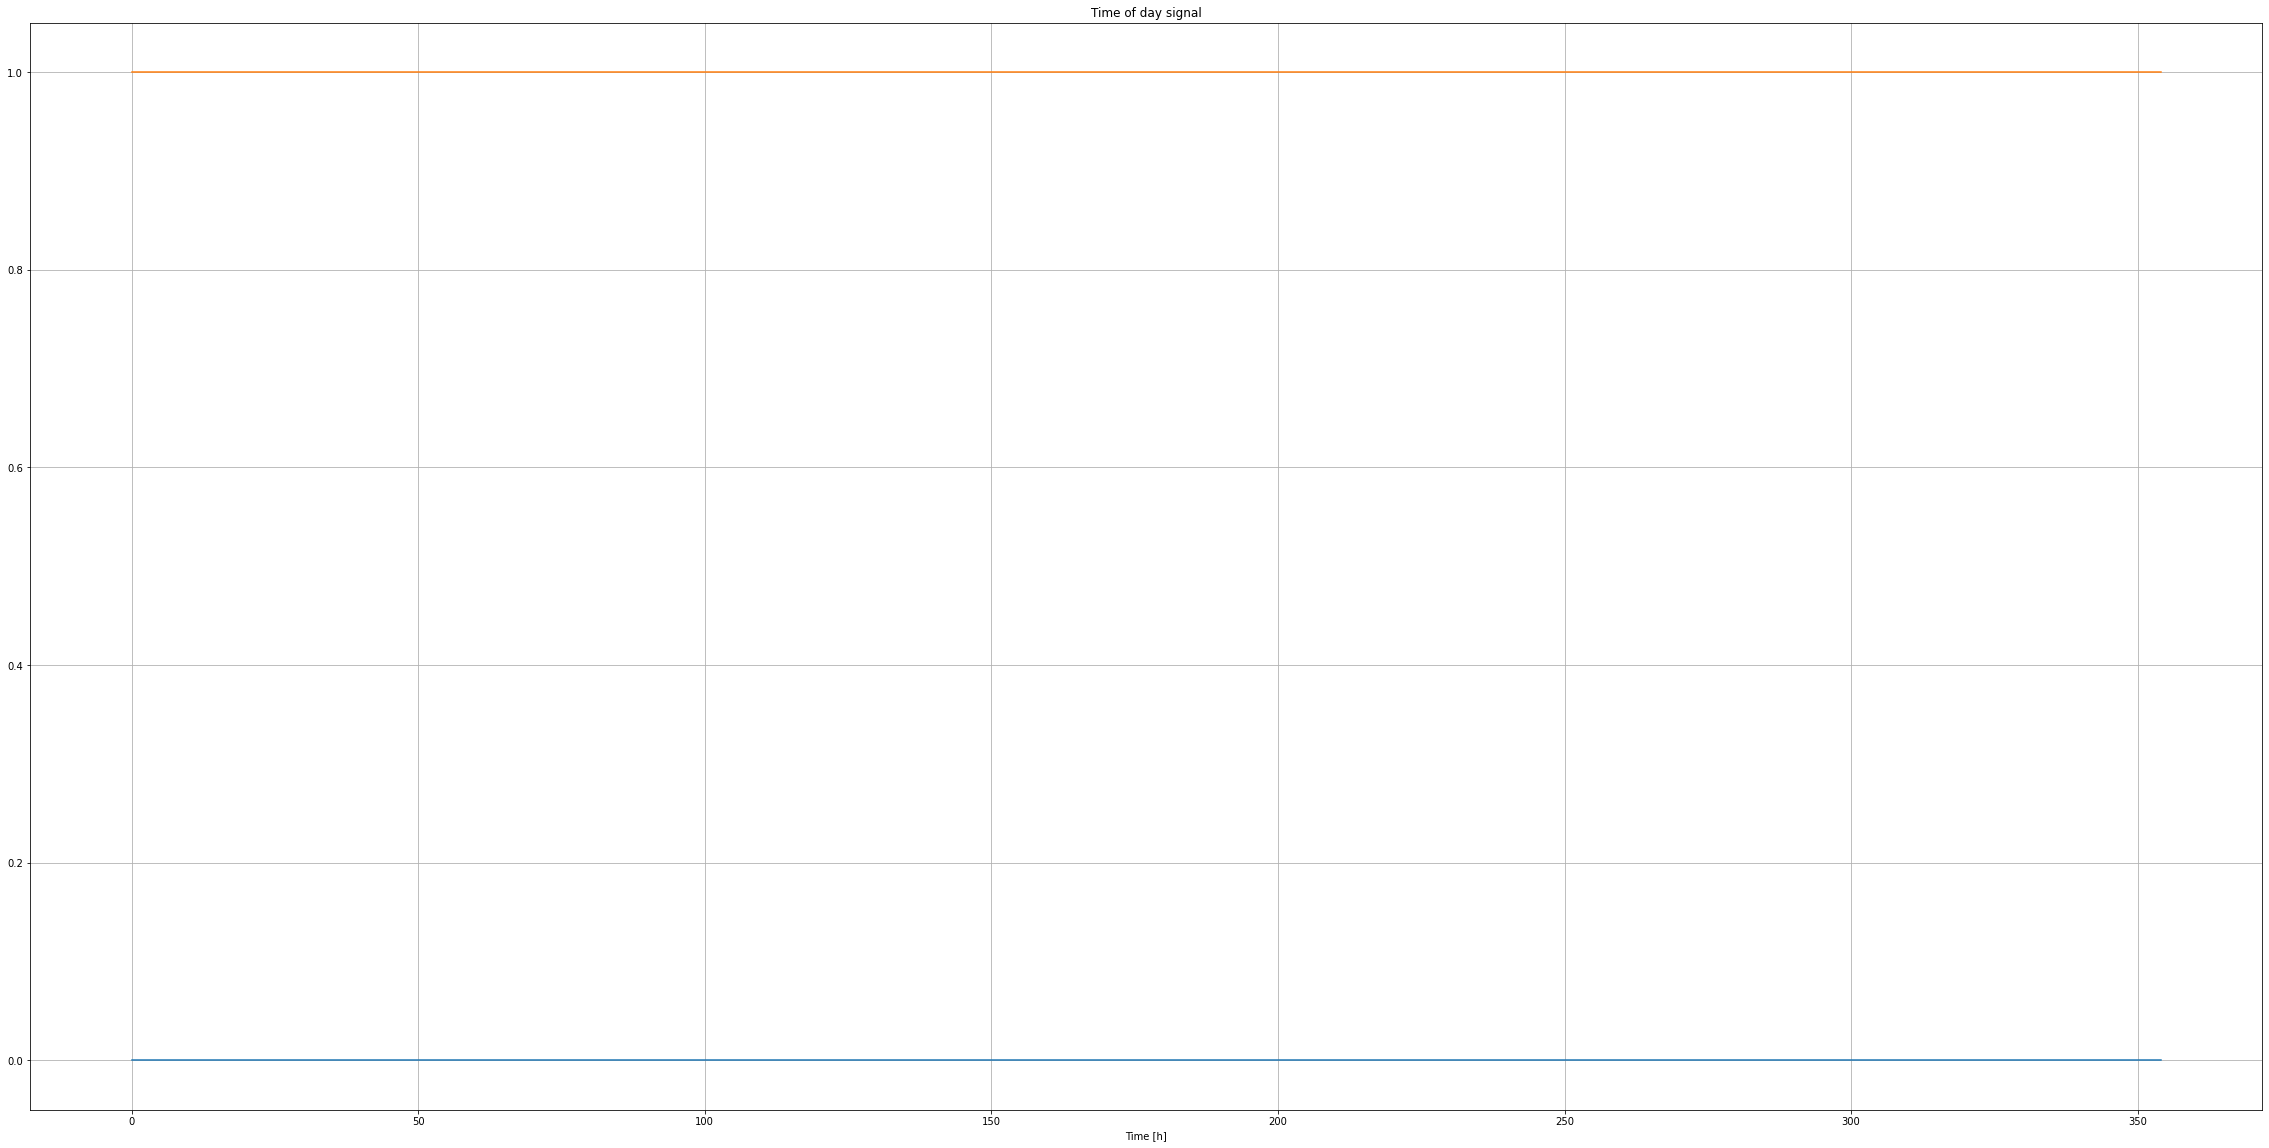

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(np.array(df['Day sin'])[:355])
plt.plot(np.array(df['Day cos'])[:355])
plt.grid(True)
plt.xlabel('Time [h]')
plt.title('Time of day signal')
plt.show()

### **Data Visualisation on a Yearly Basis**

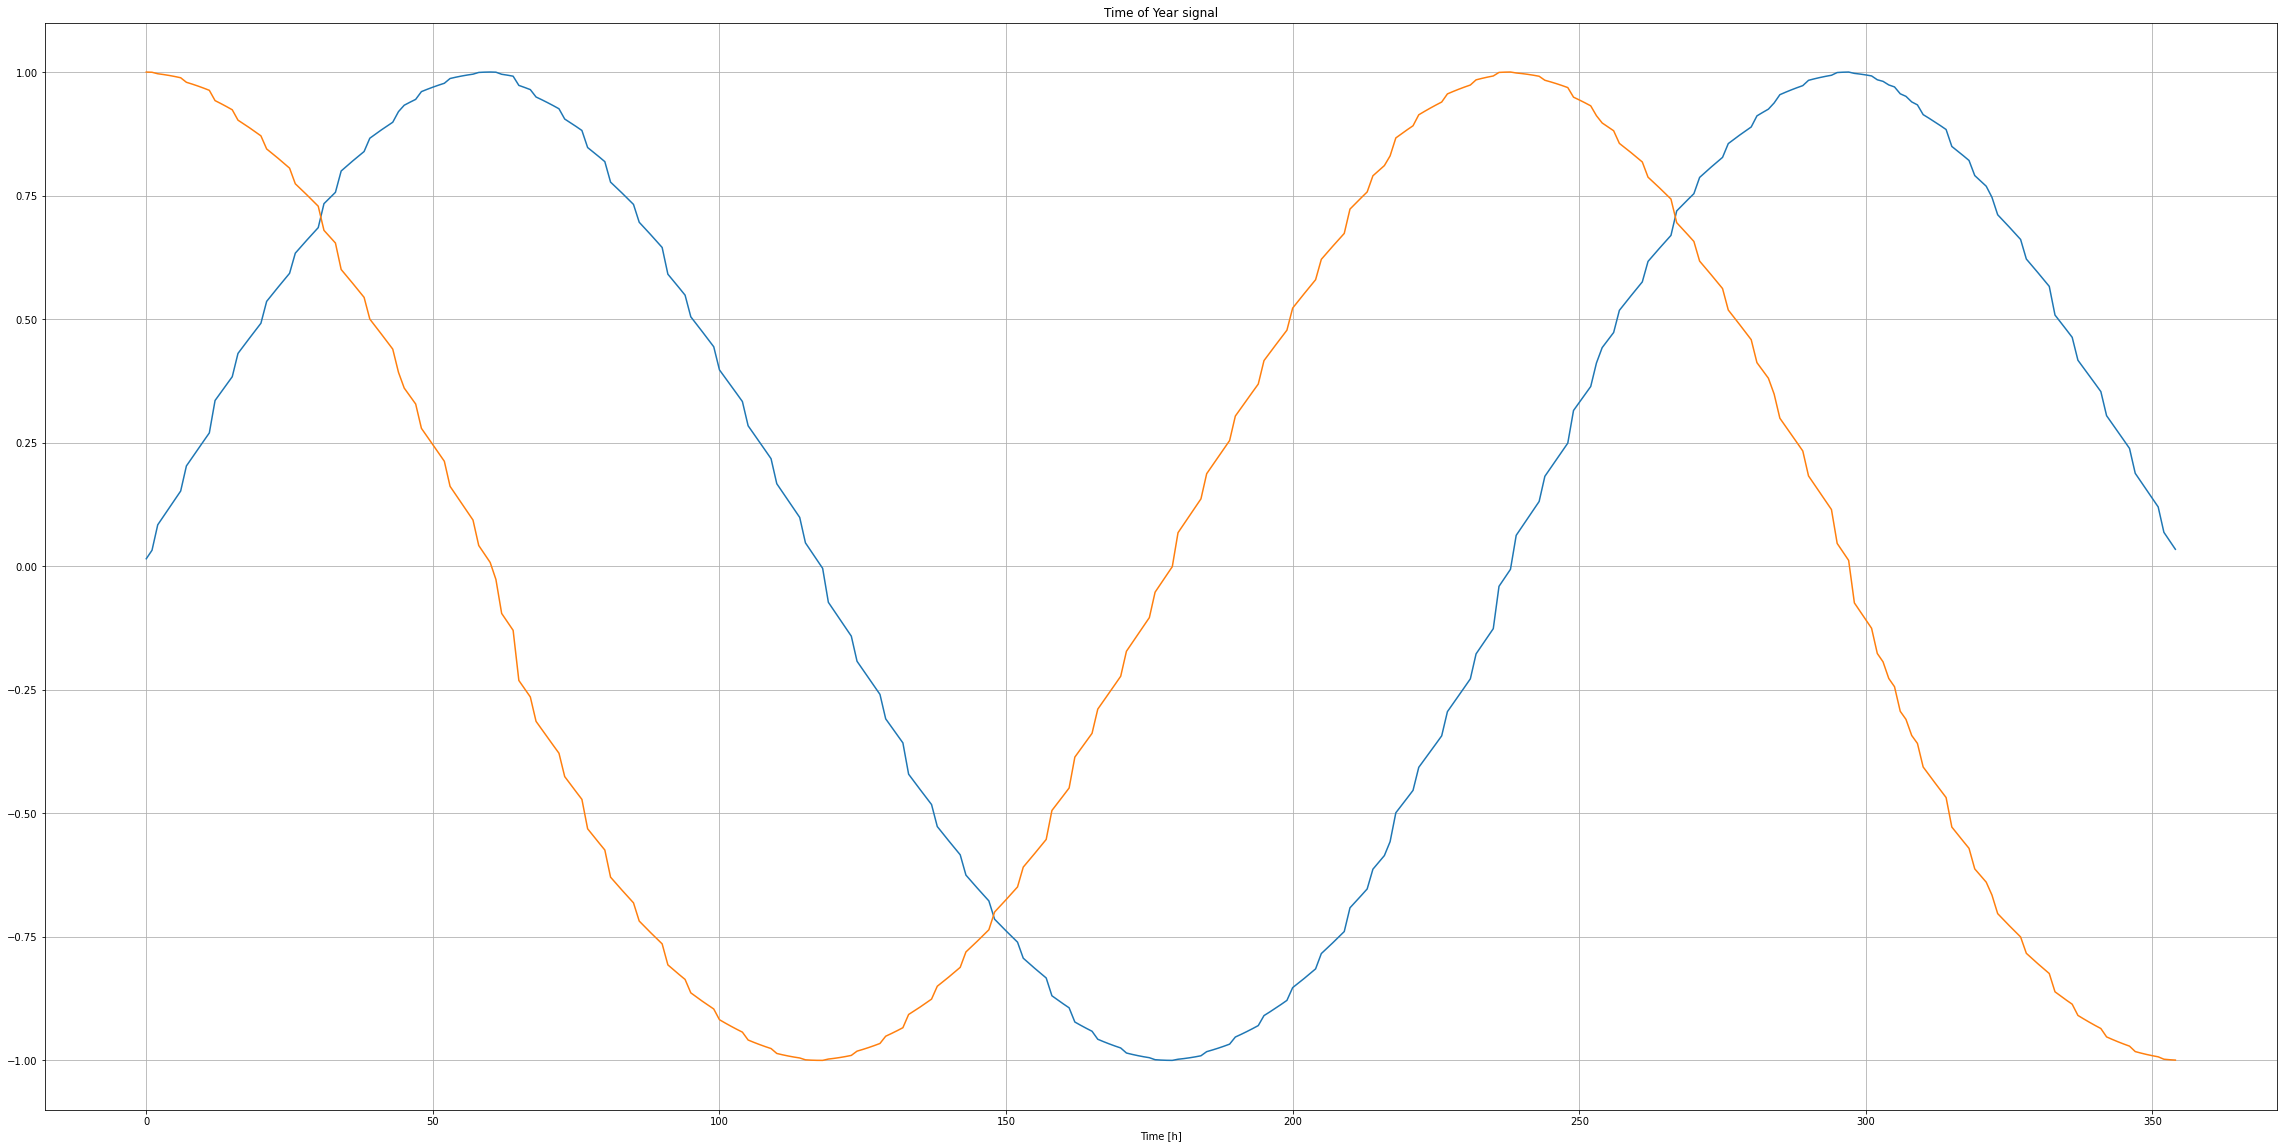

In [ ]:
plt.figure(figsize=(40,20))
plt.plot(np.array(df['Year sin'])[:355])
plt.plot(np.array(df['Year cos'])[:355])
plt.grid(True)
plt.xlabel('Time [h]')
plt.title('Time of Year signal')
plt.show()

### **Data visualization of NFH column using FFT analysis**

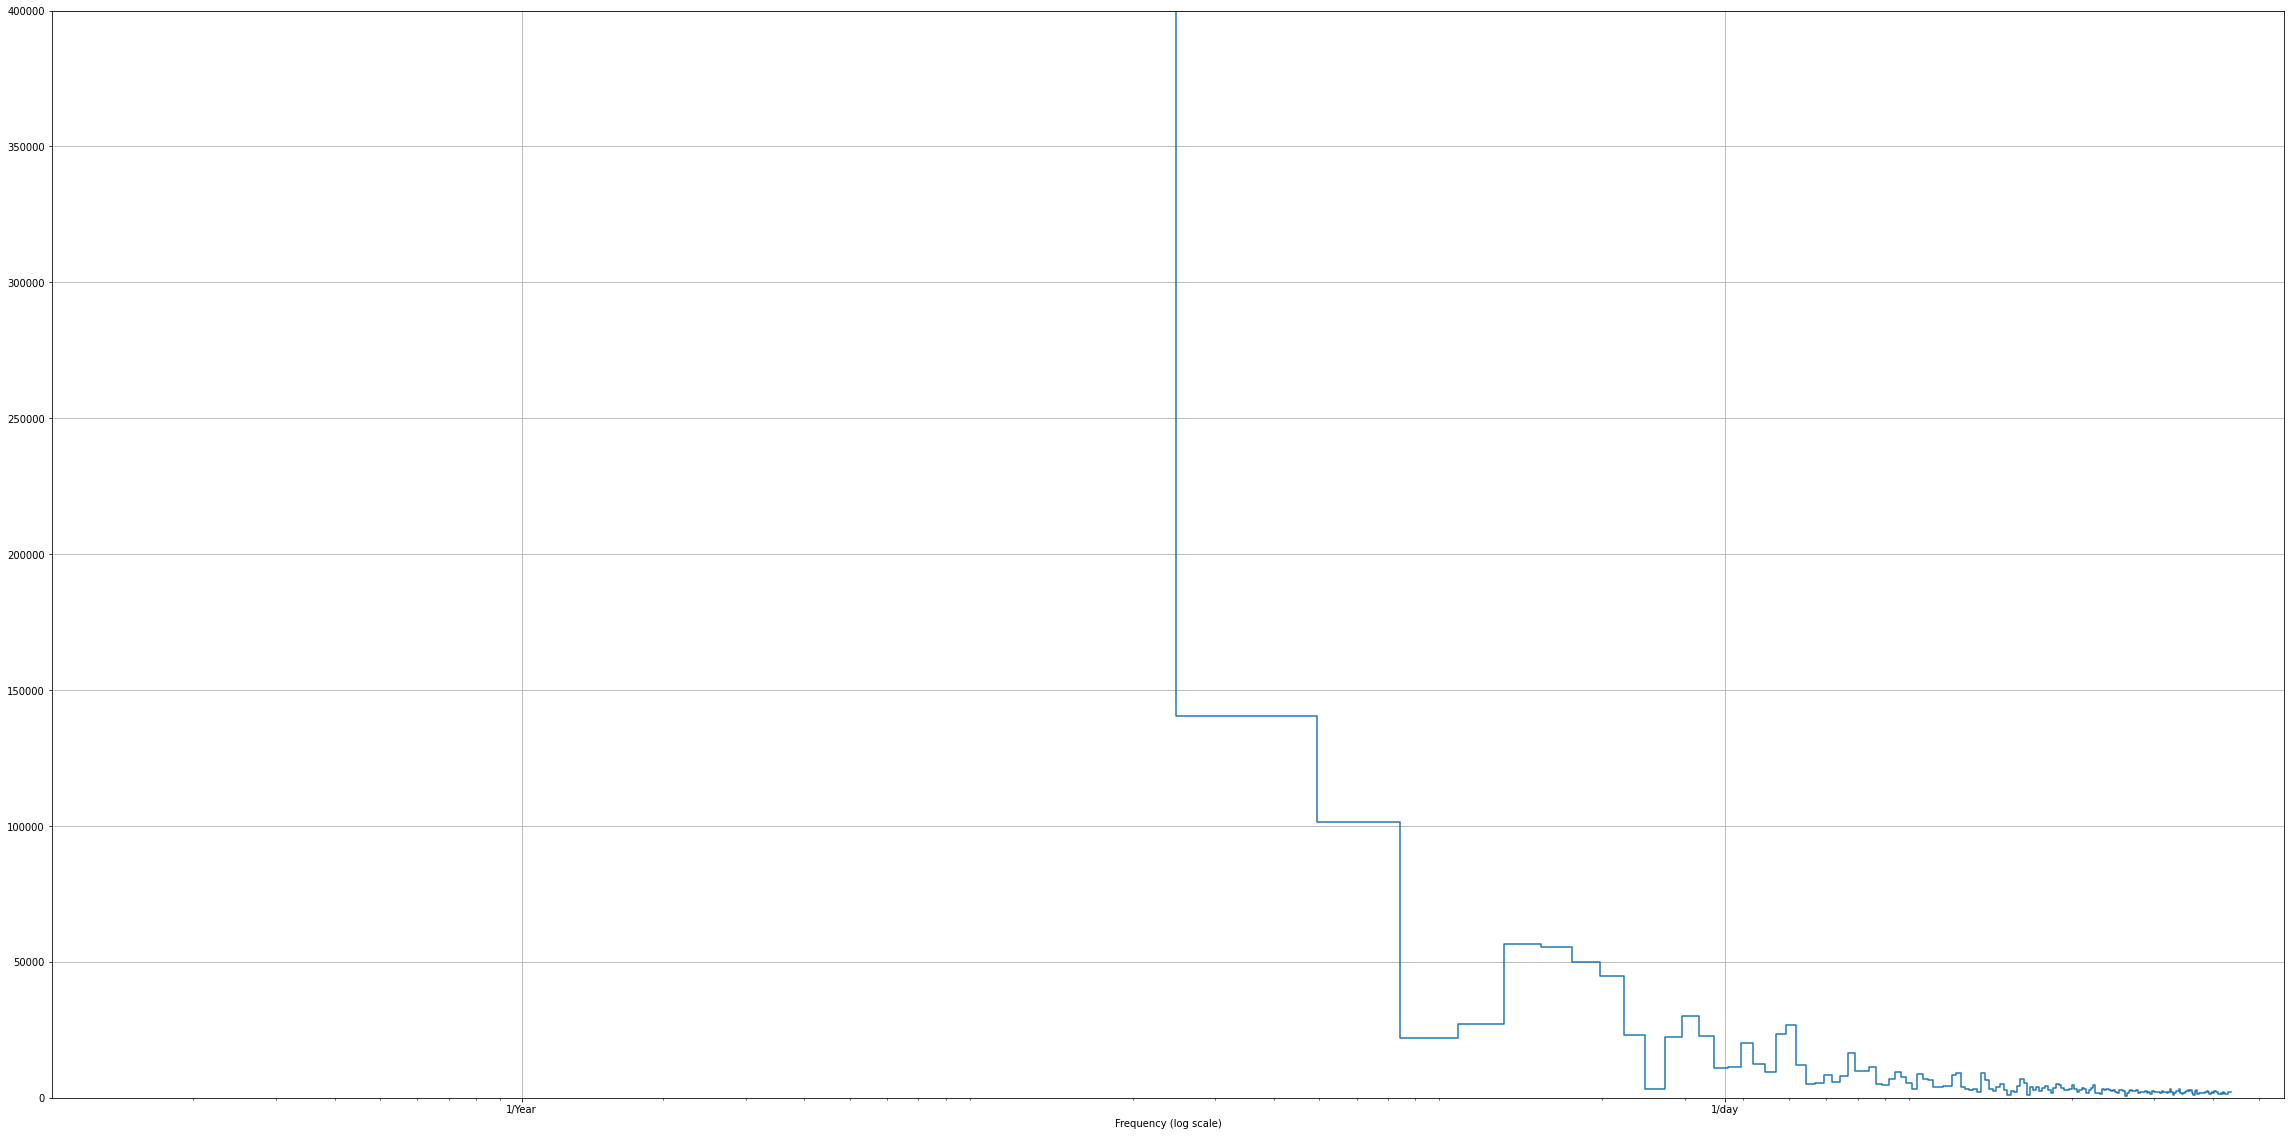

In [ ]:
fft = tf.signal.rfft(df['nfh'])
plt.figure(figsize=(40,20))
f_per_dataset = np.arange(0, len(fft))
n_samples_h = len(df['nfh'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)
plt.grid(True)
f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')
plt.show()

### **Data visualization of NFL column using FFT analysis**

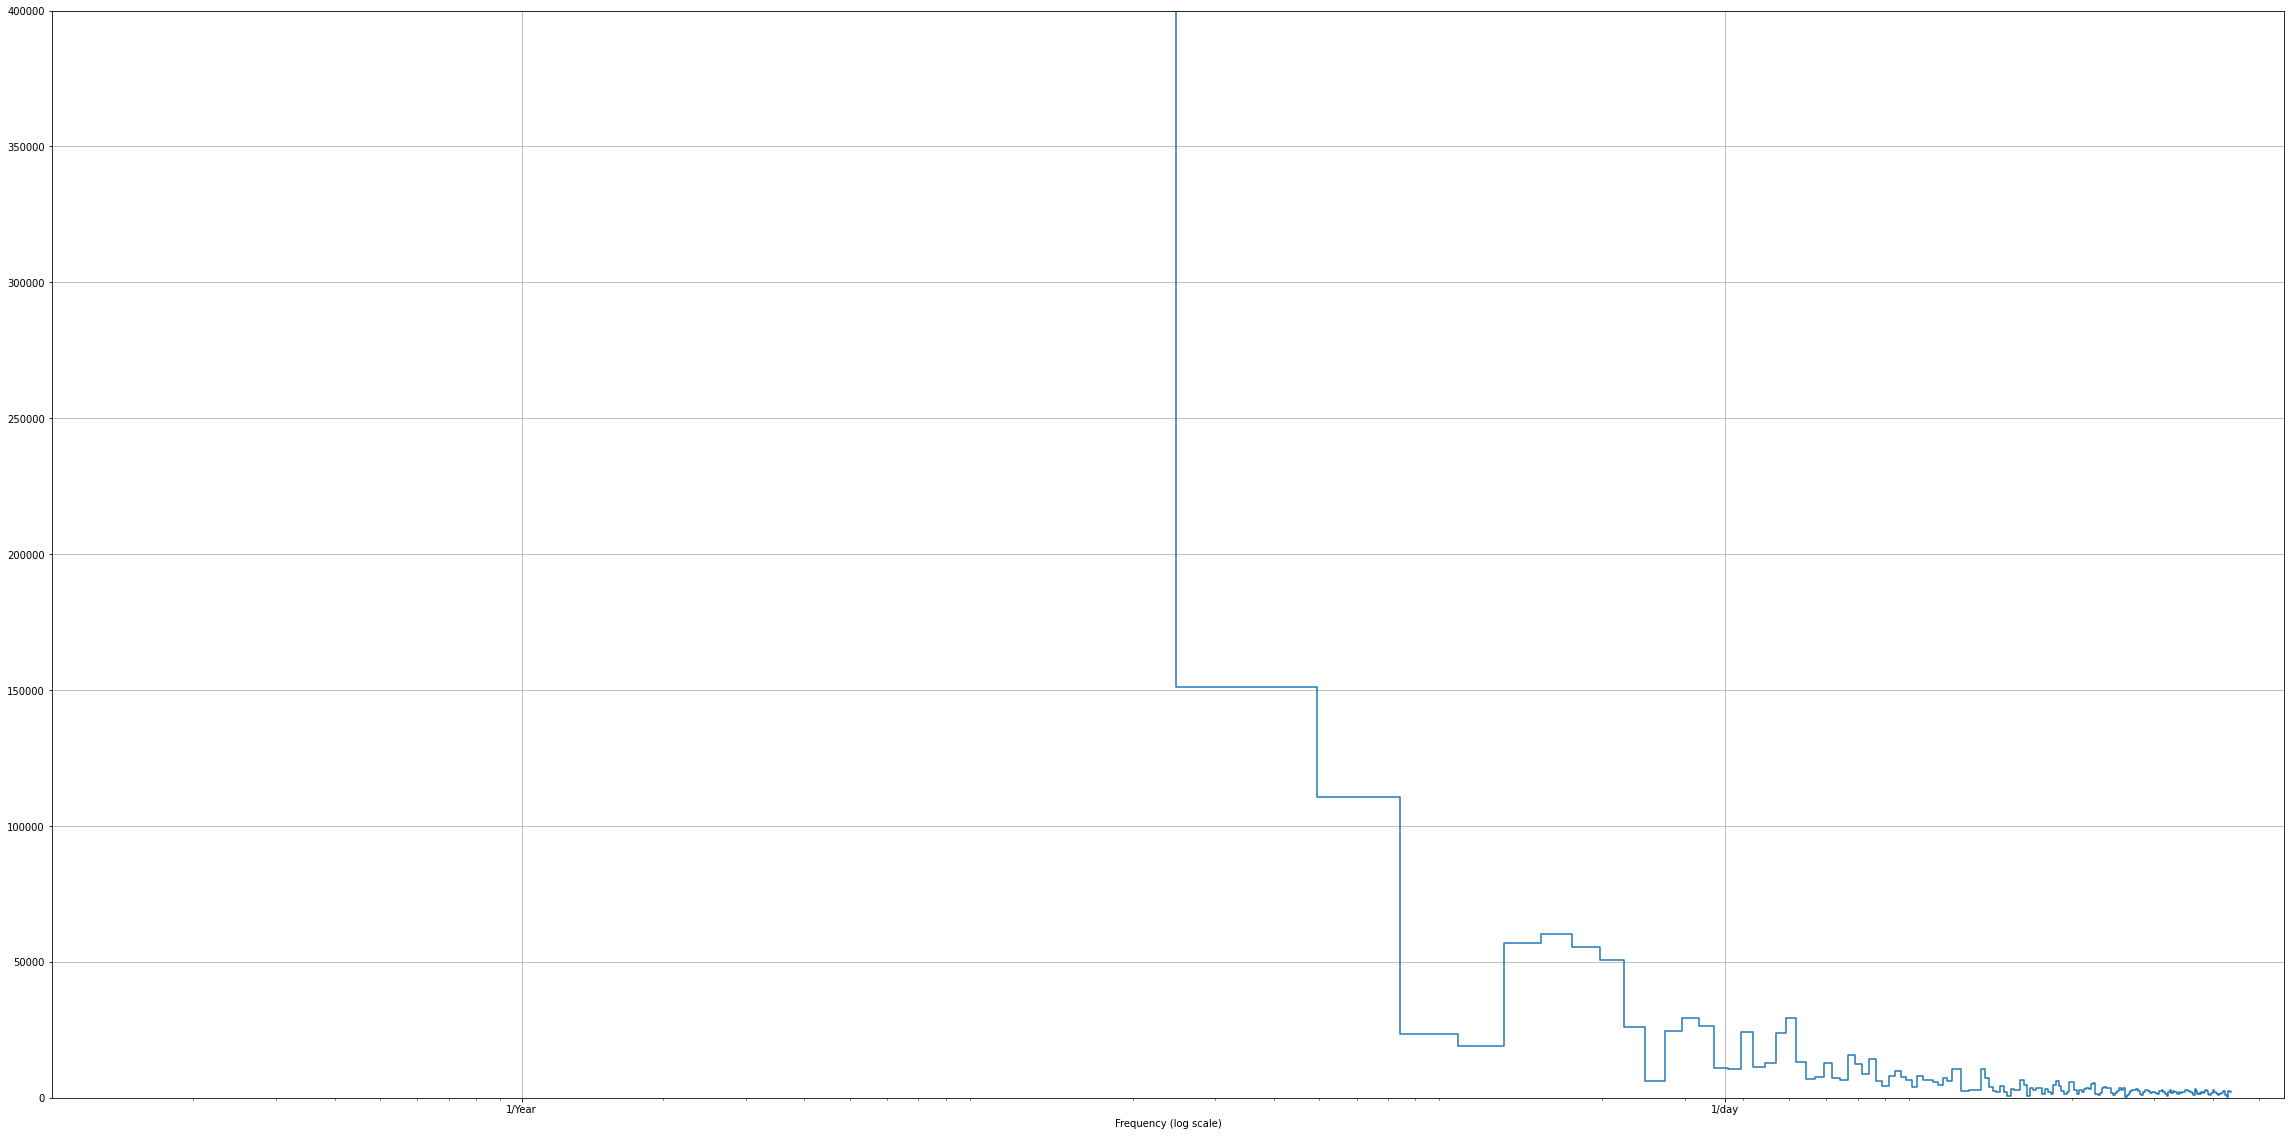

In [ ]:
fft = tf.signal.rfft(df['nfl'])
f_per_dataset = np.arange(0, len(fft))
plt.figure(figsize=(40,20))
n_samples_h = len(df['nfl'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)
plt.grid(True)
f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')
plt.show()

**Conclusion: Based on the above graphs we can conclude that model prediction would be sufficient on a yearly basis and this is true due to the fact that in the dataset we can see date values varying in years so hence this supports the same**

### **Train Test split**

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)] # 70% train dataset
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.3):]# 30% test dataset

train_df=train_df.reset_index()
val_df=val_df.reset_index()
test_df=test_df.reset_index()
train_df=train_df.drop(columns=['index'])
val_df=val_df.drop(columns=['index'])
test_df=test_df.drop(columns=['index'])
train_df1=train_df.copy()
test_df1=test_df.copy()
val_df1=val_df.copy()

**Segregation of train ,test & val datasets**

In [ ]:
train_df

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,nfh,nfl
0,12115.673242,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,-3.371804e-12,1.0,0.015052,0.999887,12177.119957,12151.571552
1,12195.406448,12251.196928,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.2,879.0,973.0,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,9.267350e-13,1.0,0.032250,0.999480,12275.487382,12173.355954
2,12272.929018,12228.903255,3732.00,3835.84,-103.84,3778.78,3802.48,-23.7,360.0,1502.0,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,-7.295644e-13,1.0,0.083765,0.996486,12299.127043,12181.887534
3,12237.309351,12051.960005,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,-1.098294e-11,1.0,0.100894,0.994897,12242.227141,12030.371144
4,12149.137851,12017.343536,4109.04,4624.89,-515.85,5162.02,4413.62,748.4,725.0,1109.0,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,-6.684402e-12,1.0,0.117994,0.993014,12192.474725,11985.555622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,14332.220114,14231.671710,13171.18,7141.35,6029.83,4792.70,7165.24,-2372.54,1074.0,887.0,-0.21,0.0692,-0.30,2.01,-0.1293,0.3506,-0.80,-0.810001,-5.026111e-12,1.0,0.130923,0.991393,14340.116998,14188.548816
244,14346.763360,14362.598633,9652.29,6513.39,3138.90,4496.85,7106.98,-2610.13,778.0,1210.0,-0.27,-0.5692,0.65,2.09,0.1693,-0.0772,-0.45,2.520000,-6.682411e-12,1.0,0.181890,0.983319,14417.986966,14274.102292
245,14497.945979,14512.846556,9354.82,8783.35,571.47,5556.61,6891.11,-1334.5,1037.0,917.0,0.83,0.1700,2.18,1.02,-0.2105,0.2796,0.02,-0.750000,-2.383872e-12,1.0,0.198778,0.980044,14537.844661,14418.999666
246,14555.672254,14626.855537,10263.57,8384.51,1879.06,5777.20,8147.37,-2370.17,667.0,1309.0,-0.52,-0.1018,-1.01,0.57,-0.1940,-0.0230,0.06,-1.120001,-1.263725e-11,1.0,0.215608,0.976480,14648.152613,14508.967604


In [ ]:
val_df

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,nfh,nfl
0,14672.003809,14691.948701,7240.81,6269.75,971.06,4914.07,5856.14,-942.07,518.0,1432.0,-0.40,-0.7415,-2.34,-2.09,0.0440,-0.4139,-0.54,1.090000,-4.040172e-12,1.0,0.249070,0.968486,14729.231664,14563.343016
1,14682.481531,14573.937584,6715.91,6458.36,257.55,5146.41,5345.71,-199.3,1431.0,517.0,-0.10,0.3965,0.24,2.22,-0.0010,0.2139,0.25,-1.100000,-1.397932e-12,1.0,0.315070,0.949068,14714.912106,14480.442931
2,14515.578392,14572.879876,7701.29,5412.24,2289.05,5084.73,5949.35,-864.62,997.0,937.0,-0.45,0.1000,1.02,1.41,-0.2290,0.0200,0.44,-1.660000,-1.165131e-11,1.0,0.331350,0.943508,14645.972963,14427.467418
3,14551.584522,14655.403965,9104.25,7489.59,1614.66,5053.57,6093.05,-1039.48,601.0,1369.0,-0.03,0.1150,-1.01,-2.27,0.0405,-0.0240,-0.15,-0.260000,-7.352770e-12,1.0,0.347531,0.937669,14693.201278,14517.302013
4,14703.493836,14647.997590,8326.77,8962.46,-635.69,4859.95,6150.30,-1290.35,477.0,1472.0,0.39,-0.0700,-0.06,-0.98,0.0146,-0.2160,-0.21,0.590000,-3.054232e-12,1.0,0.363609,0.931552,14771.798953,14553.138062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,14914.310433,14924.468542,7951.05,11416.12,-3465.07,5761.78,4342.47,1419.31,799.0,1087.0,0.24,-0.4647,-1.56,-0.35,-0.1310,-0.4000,-0.10,1.000000,-3.802988e-12,1.0,0.883640,-0.468167,15025.685959,14816.918099
67,14868.249310,14779.700304,5849.01,7621.38,-1772.37,4952.60,3965.26,987.34,778.0,1134.0,0.34,-0.5102,3.72,2.00,-0.1560,0.7000,0.76,0.869999,-1.160749e-12,1.0,0.849359,-0.527815,14974.689022,14733.066609
68,14791.926032,14607.074884,4955.96,6066.46,-1110.50,4255.47,4496.08,-240.61,1187.0,707.0,-0.49,0.5449,1.85,0.01,0.0035,-0.0800,0.24,-0.330000,-1.141413e-11,1.0,0.840154,-0.542348,14844.765601,14582.716236
69,14688.950811,14612.127085,6326.62,5104.04,1222.58,4036.91,4669.42,-632.51,1056.0,850.0,-0.04,0.3225,0.97,0.03,-0.1990,-0.0910,1.30,-0.760000,-7.115587e-12,1.0,0.830700,-0.556720,14716.700093,14540.494012


In [ ]:
test_df


,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,nfh,nfl
0,9837.276863,9873.176784,4608.09,6086.61,-1478.52,4742.48,3580.97,1161.51,847.0,1036.0,1.26,0.4890,0.27,1.16,0.2560,0.2257,-0.36,-0.730003,-2.858239e-12,1.0,0.267579,-0.963536,9983.324733,9688.136896
1,9944.652531,9885.864632,4910.75,5397.37,-486.62,3759.97,3591.92,168.05,1027.0,838.0,-1.71,-0.1850,-1.08,-0.40,0.0275,-0.0900,-0.13,-0.199997,-1.311162e-11,1.0,0.250964,-0.967996,10011.684399,9688.706395
2,9896.618021,9870.682589,4918.00,4551.43,366.57,3671.35,2540.08,1131.27,1407.0,455.0,0.12,-0.1230,0.41,1.16,0.1101,0.2547,-0.31,-0.530003,-8.813077e-12,1.0,0.234276,-0.972170,9996.542212,9769.484567
3,9865.360977,10017.598197,14764.29,13527.29,1237.00,6511.56,7392.22,-880.66,1295.0,584.0,-0.43,-0.2370,0.07,-0.46,-0.1699,0.2000,0.55,2.180000,-4.514538e-12,1.0,0.217518,-0.976056,10068.824920,9817.624812
4,10037.018848,10195.855497,5467.93,5043.72,424.21,4781.76,6069.45,-1287.69,1376.0,561.0,0.47,0.3750,0.09,0.88,-0.4057,0.2453,0.96,-3.349998,-6.170837e-12,1.0,0.166878,-0.985978,10219.235630,10004.574643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,15832.780716,15711.203010,7094.36,9985.30,-2890.94,5377.76,4239.00,1138.76,783.0,1186.0,0.67,0.2234,-0.04,-0.16,0.0900,0.0880,0.01,-0.349999,-2.140077e-13,1.0,0.136996,-0.990572,15871.734957,15673.598435
245,15781.799179,15763.679655,6766.31,7445.15,-678.84,6844.01,5011.25,1832.76,1070.0,902.0,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000,-1.046738e-11,1.0,0.119936,-0.992782,15846.875708,15703.024907
246,15829.576703,15838.276361,4275.71,5934.43,-1658.72,5634.19,4357.11,1277.08,1069.0,940.0,-0.90,-0.1242,-0.39,-0.96,0.1515,-0.3200,-0.19,0.140000,-1.212368e-11,1.0,0.068564,-0.997647,15869.452759,15764.937429
247,15904.676773,15837.898386,10932.02,10815.39,116.63,8687.31,6877.26,1810.05,903.0,1084.0,-0.52,-0.3158,0.08,-0.26,0.0040,0.2000,-0.17,0.260000,-7.825145e-12,1.0,0.051392,-0.998679,15910.968841,15804.933350


## **Dependent Model Algorithm(Pipeline Model)**

In [ ]:
train_df=train_df.drop(columns=['nfl'])
val_df=val_df.drop(columns=['nfl'])
test_df=test_df.drop(columns=['nfl'])
num_features = train_df.shape[1] 

### **NFH-column Time Series Forecasting**

**Window Generator**

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w1 = WindowGenerator(input_width=23, label_width=1, shift=23,
                     label_columns=['nfh'])
w1

Total window size: 46
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label indices: [45]
Label column name(s): ['nfh']

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['nfh'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['nfh']

**Splitting Window**

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]).astype(np.float32),
                           np.array(train_df[100:100+w2.total_window_size]).astype(np.float32),
                           np.array(train_df[200:200+w2.total_window_size]).astype(np.float32)])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 23)
Inputs shape: (3, 6, 23)
labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs, example_labels

**Data Visualization of Window Plot**

In [ ]:
def plot(self, model=None, plot_col='nfh', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

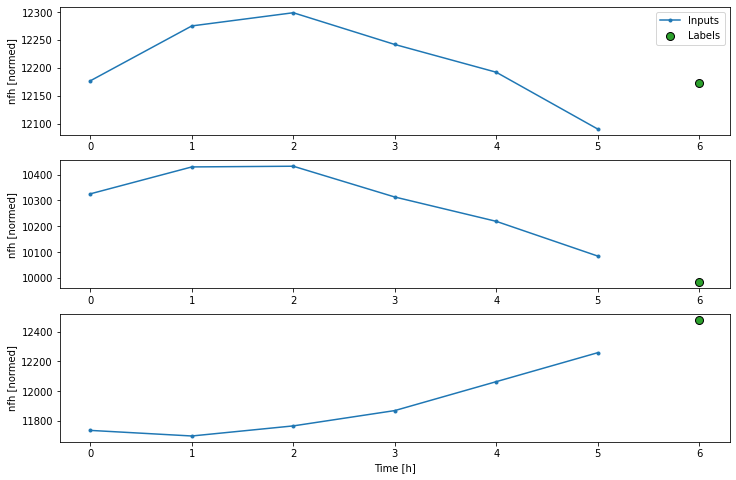

In [ ]:
w2.plot()

**Dataset Preparation for Model prediction**

**Creating windows for training ,testing and validation based on train ,test val dataset**

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 6, 23), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 23)
Labels shape (batch, time, features): (32, 1, 1)


In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['nfh'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['nfh']

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 23)
Labels shape (batch, time, features): (32, 1, 1)


## **Model Training/Evaluation (Time series forecasting for columns='nfh')**

### **Single Step Time Forecasting Models**

#### **BaseLine model**

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices['nfh'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 4ms/step - loss: 18227.2559 - mean_absolute_error: 107.7853


In [ ]:
wide_window = WindowGenerator(
    input_width=23, label_width=23, shift=1,
    label_columns=['nfh'])

wide_window

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label column name(s): ['nfh']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 23, 23)
Output shape: (32, 23, 1)


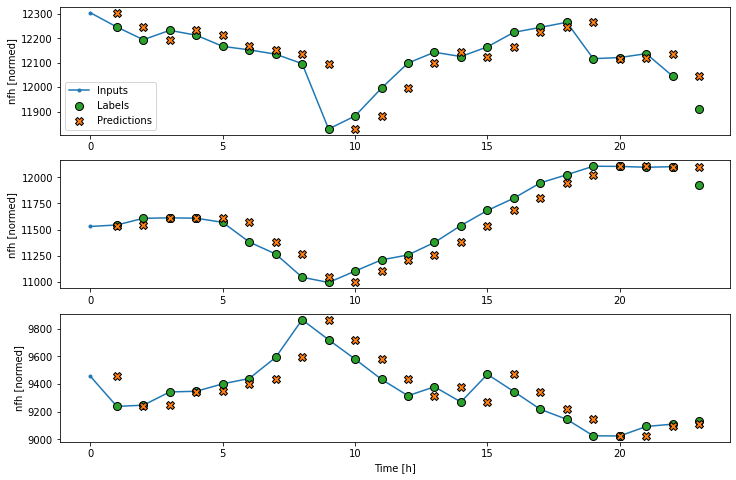

In [ ]:
wide_window.plot(baseline)

#### **Compile Function for CNN,Linear,RNN and Dense Model**

In [ ]:
MAX_EPOCHS = 250 # I have given limited the maximum epocj=hs to this so as to observe the results for this dataset, since i havent performed the featured scaling and this dataset being regression based , the mean squared error recorded for each algorithm under the same would be high hence to scale it down , i have given this amount of epochs,dont worry sir after a poin the algorithm would cut offso hence it wont be time consuming during training sir

# Since this a regresion based dataset hence this would be the parameters required to perform the same
def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

### **Linear model**

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 23)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/250
8/8 [==============================] - 1s 23ms/step - loss: 274232480.0000 - mean_absolute_error: 16171.0293 - val_loss: 446664224.0000 - val_mean_absolute_error: 20976.7344
Epoch 2/250
8/8 [==============================] - 0s 9ms/step - loss: 258767920.0000 - mean_absolute_error: 15702.3408 - val_loss: 421950304.0000 - val_mean_absolute_error: 20385.0098
Epoch 3/250
8/8 [==============================] - 0s 9ms/step - loss: 243894672.0000 - mean_absolute_error: 15239.8340 - val_loss: 398163328.0000 - val_mean_absolute_error: 19798.5547
Epoch 4/250
8/8 [==============================] - 0s 9ms/step - loss: 229517952.0000 - mean_absolute_error: 14779.7939 - val_loss: 375376416.0000 - val_mean_absolute_error: 19220.0703
Epoch 5/250
8/8 [==============================] - 0s 11ms/step - loss: 215427744.0000 - mean_absolute_error: 14328.5654 - val_loss: 353751104.0000 - val_mean_absolute_error: 18654.3027
Epoch 6/250
8/8 [==============================] - 0s 11ms/step - loss: 2

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 23, 23)
Output shape: (32, 23, 1)


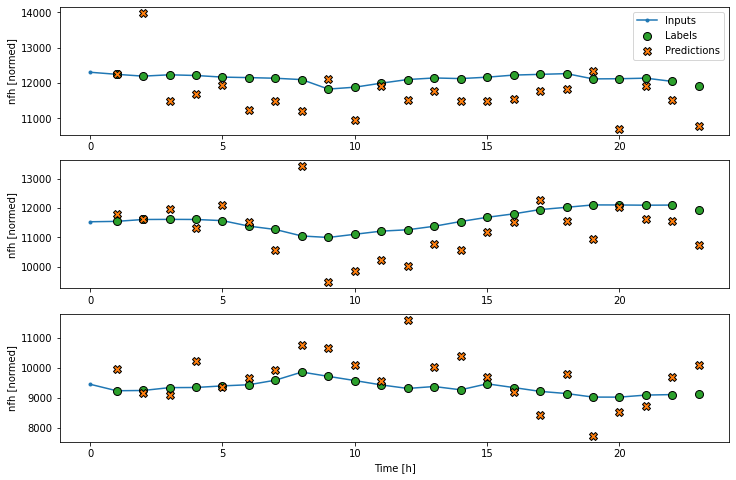

In [ ]:
wide_window.plot(linear)

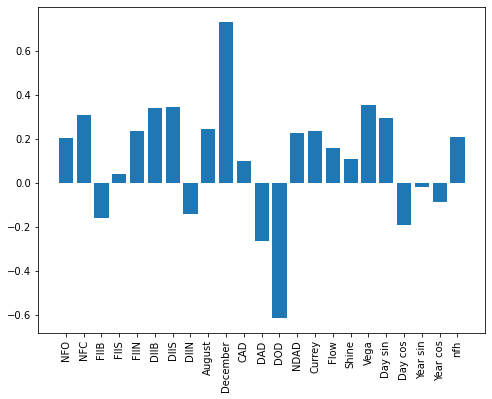

In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

#### **Dense Model**

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/250
8/8 [==============================] - 1s 39ms/step - loss: 54016336.0000 - mean_absolute_error: 5707.8604 - val_loss: 12897993.0000 - val_mean_absolute_error: 3020.3162
Epoch 2/250
8/8 [==============================] - 0s 16ms/step - loss: 11793047.0000 - mean_absolute_error: 2650.6887 - val_loss: 17140422.0000 - val_mean_absolute_error: 4090.8594
Epoch 3/250
8/8 [==============================] - 0s 18ms/step - loss: 4140551.5000 - mean_absolute_error: 1710.6891 - val_loss: 7493272.0000 - val_mean_absolute_error: 2646.3420
Epoch 4/250
8/8 [==============================] - 0s 14ms/step - loss: 1792108.6250 - mean_absolute_error: 1107.7238 - val_loss: 2848298.0000 - val_mean_absolute_error: 1611.4982
Epoch 5/250
8/8 [==============================] - 0s 14ms/step - loss: 774214.8750 - mean_absolute_error: 744.8484 - val_loss: 1389805.6250 - val_mean_absolute_error: 1133.1569
Epoch 6/250
8/8 [==============================] - 0s 13ms/step - loss: 322110.2500 - mean_absolut

#### **Multi Step Dense Model**

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['nfh'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['nfh']

Text(0.5, 1.0, 'Given 3h as input, predict 1h into the future.')

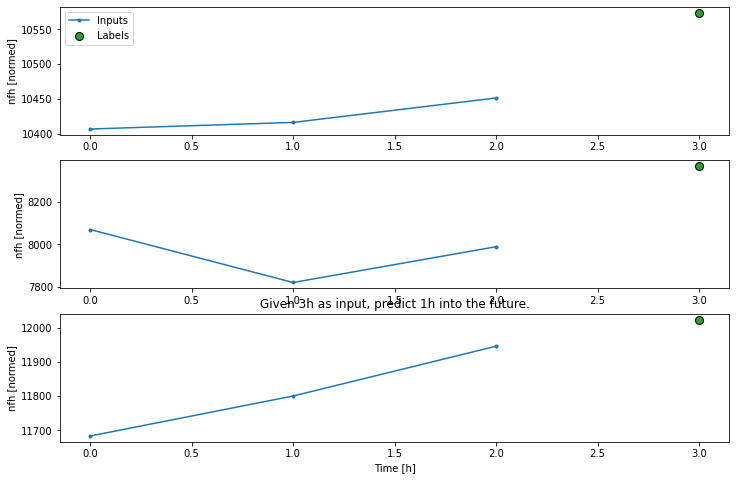

In [ ]:
conv_window.plot()
plt.title("Given 3h as input, predict 1h into the future.")

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=320, activation='relu'),
    tf.keras.layers.Dense(units=640, activation='relu'),
    tf.keras.layers.Dense(units=960, activation='relu'),
    tf.keras.layers.Dense(units=1280, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 23)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

3/3 [==============================] - 0s 8ms/step - loss: 104980.5625 - mean_absolute_error: 255.6248


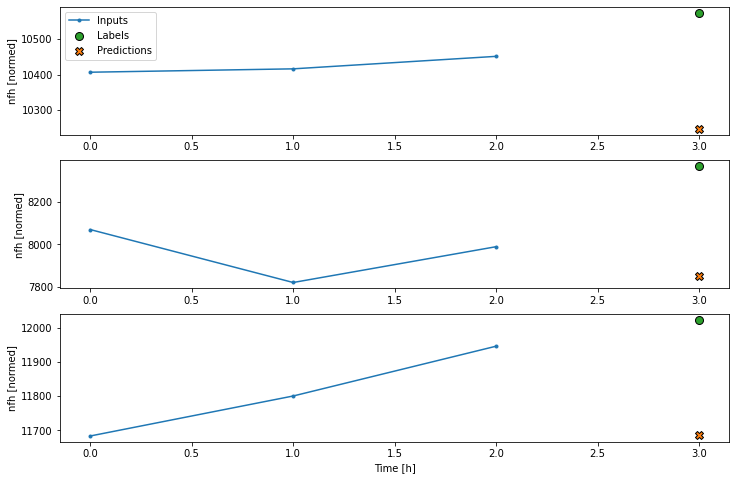

In [ ]:
conv_window.plot(multi_step_dense)

In [ ]:
print('Input shape:', wide_window.example[0].shape)


Input shape: (32, 23, 23)


#### **Convolutional Neural Network Model**

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=15000,kernel_size=(CONV_WIDTH,),activation='relu'),
    tf.keras.layers.Dense(units=12500, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 23)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

3/3 [==============================] - 1s 243ms/step - loss: 160137.9531 - mean_absolute_error: 329.1475


In [ ]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 23, 23)
Labels shape: (32, 23, 1)
Output shape: (32, 21, 1)


In [ ]:
LABEL_WIDTH = 23
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['nfh'])

wide_conv_window

Total window size: 26
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
Label column name(s): ['nfh']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 25, 23)
Labels shape: (32, 23, 1)
Output shape: (32, 23, 1)


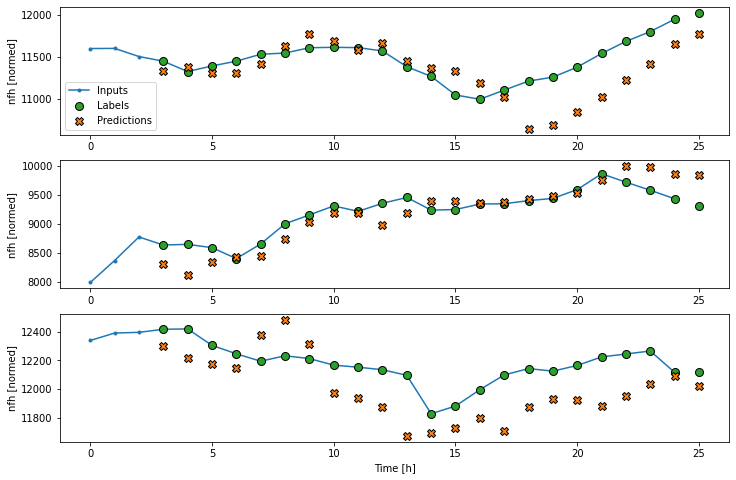

In [ ]:
wide_conv_window.plot(conv_model)

### **Recurrent Neural Network**

**Note : Since RNN records the maximum Mean Squared error( in range :10,000 to 15,000)for any given of epochs for the dataset which hasnt' been scaled ,hence i have taken the liberty to acknowldege the same**

**This happens due to the main fact that the values in the dataset arent in proper scale meaning like all under same type as mentioned earlier**

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(96, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(200, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 23, 23)
Output shape: (32, 23, 1)


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 29ms/step - loss: 210895408.0000 - mean_absolute_error: 14518.9316


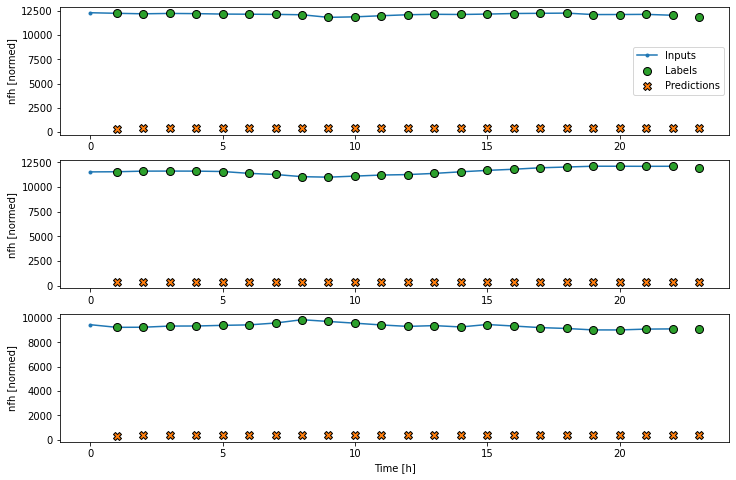

In [ ]:
wide_window.plot(lstm_model)

### **Model Performance Chart**

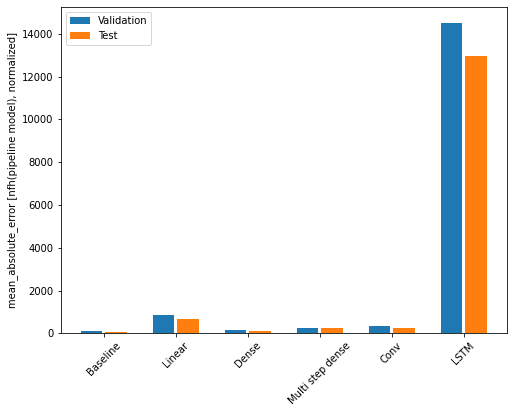

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [nfh(pipeline model), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 79.0395
Linear      : 691.9550
Dense       : 106.8808
Multi step dense: 232.2493
Conv        : 257.7015
LSTM        : 12939.6396


### **Multi Output Time Forecasting Models**

The models so far all predicted a single output feature, `nfh`, for a single time step.

All of these models can be converted to predict multiple features just by changing the number of units in the output layer and adjusting the training windows to include all features in the `labels`, 

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=23, label_width=23, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 23, 23)
Labels shape (batch, time, features): (32, 23, 23)


#### **Baseline Model**

In [ ]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 7ms/step - loss: 5792672.0000 - mean_absolute_error: 639.6846


In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])


In [ ]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 5ms/step - loss: 2666541.0000 - mean_absolute_error: 642.3440


#### **RNN Model**

In [ ]:
%%time
wide_window = WindowGenerator(
    input_width=23, label_width=23, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

2/2 [==============================] - 0s 8ms/step - loss: 41894924.0000 - mean_absolute_error: 3412.8525

CPU times: user 59.2 s, sys: 4.59 s, total: 1min 3s
Wall time: 1min 7s


### **Model Performance Chart**

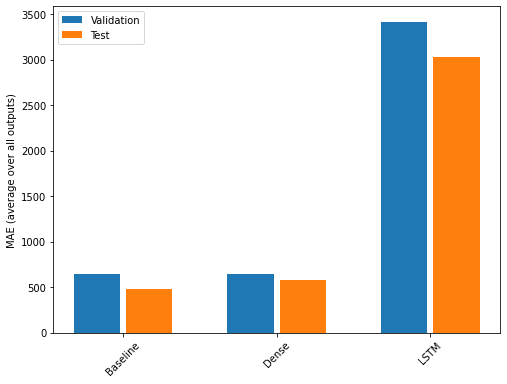

In [ ]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 483.4928
Dense          : 572.4738
LSTM           : 3025.0913


**Since the above models makes the time predictions under an hour basis for a single step , we can go with the multi step prediction which could performs with multiple steps**
The alogrithms are 

**1. Single shot predictions where the entire time series is predicted at once.**

**2. Autoregressive predictions where the model only makes single step predictions and its output is fed back as its input.**

**Multi Step models**

Total window size: 46
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label indices: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Label column name(s): None

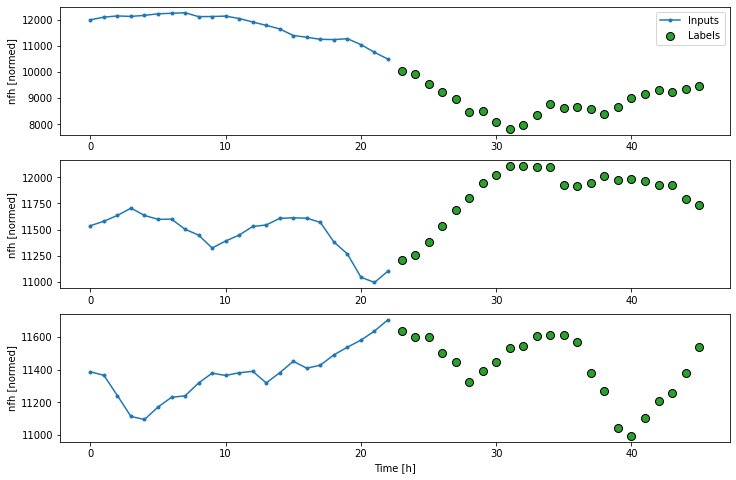

In [ ]:
OUT_STEPS = 23
multi_window = WindowGenerator(input_width=23,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

**Multi Step Baseline Model**

1/1 [==============================] - 0s 150ms/step - loss: 7016907.0000 - mean_absolute_error: 766.6168


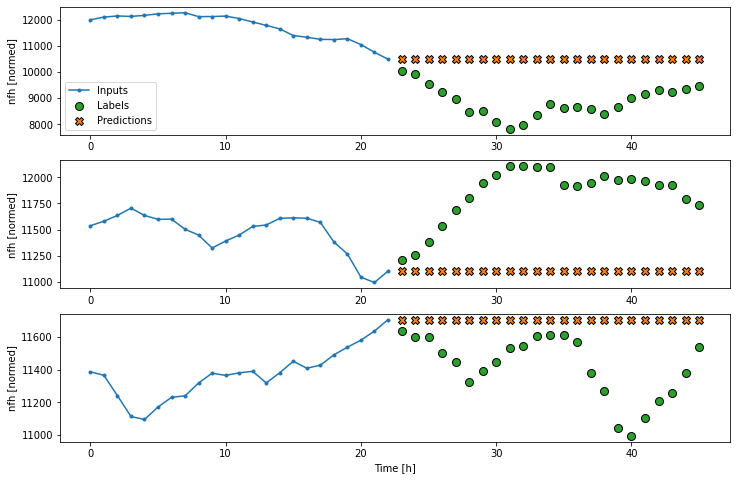

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

1/1 [==============================] - 0s 116ms/step - loss: 7676633.0000 - mean_absolute_error: 824.4333


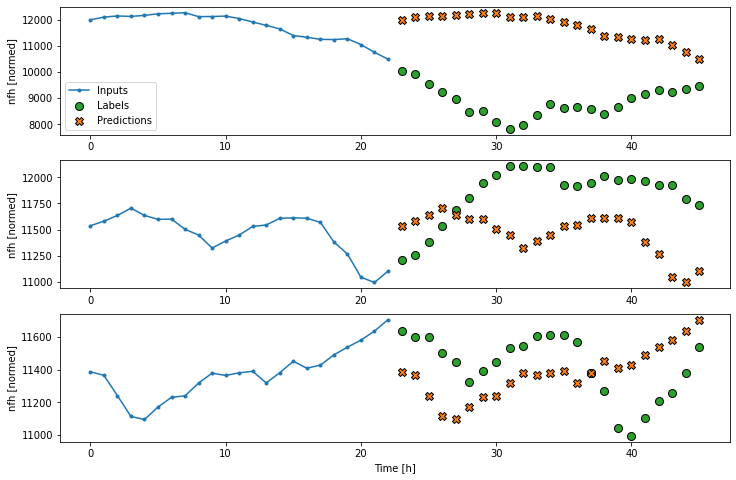

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### **Single Shot Models**

#### **Linear Model**

1/1 [==============================] - 0s 49ms/step - loss: 2557775.7500 - mean_absolute_error: 688.1663


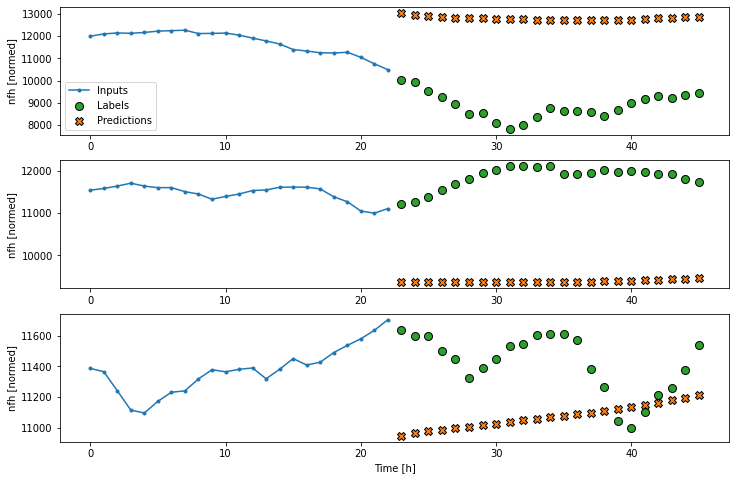

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

#### **Dense Model**

1/1 [==============================] - 0s 47ms/step - loss: 2375593.0000 - mean_absolute_error: 644.5872


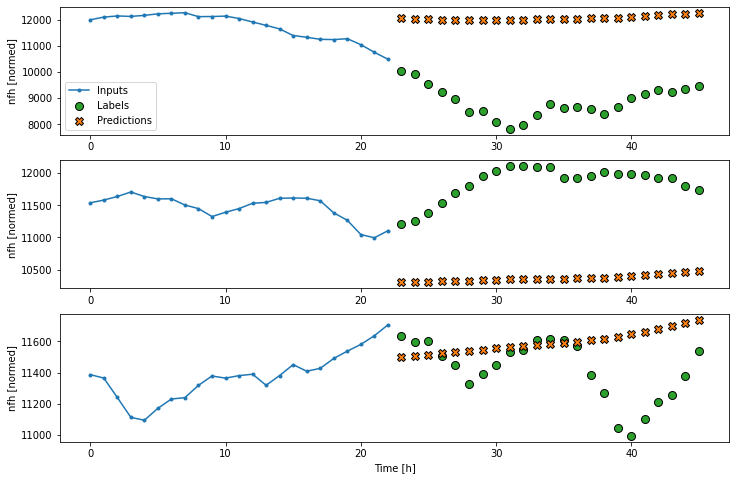

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

### **CNN Model**

1/1 [==============================] - 0s 57ms/step - loss: 2150296.2500 - mean_absolute_error: 588.5425


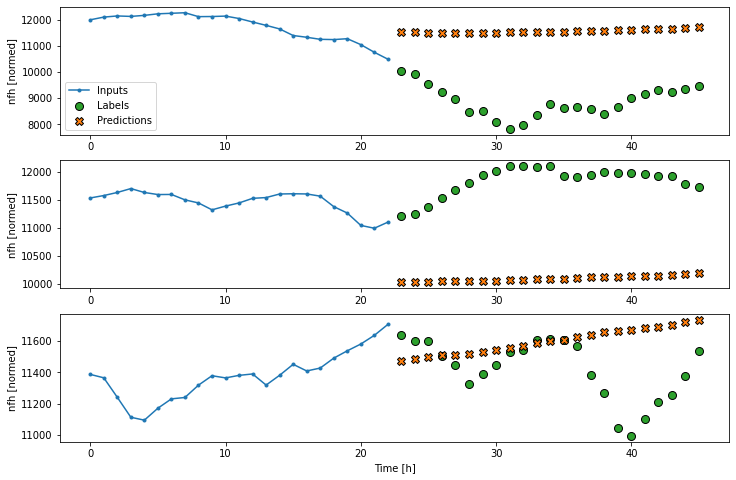

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

#### **RNN Model**

1/1 [==============================] - 0s 49ms/step - loss: 39287532.0000 - mean_absolute_error: 3321.4805


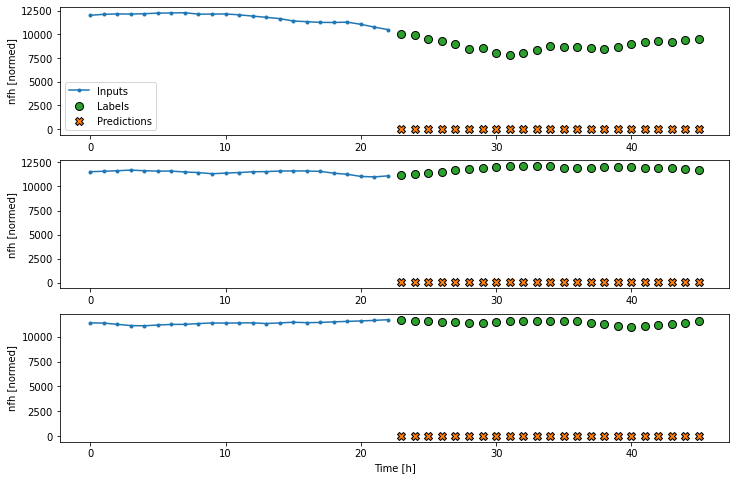

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### **Auto Regression models**

**RNN**

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 23])

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 23, 23)


1/1 [==============================] - 0s 55ms/step - loss: 39046868.0000 - mean_absolute_error: 3308.1978


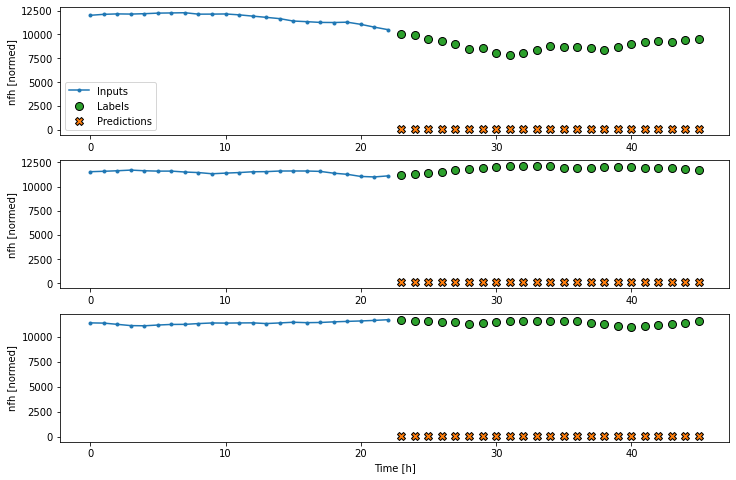

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

### **Model Performance Chart**

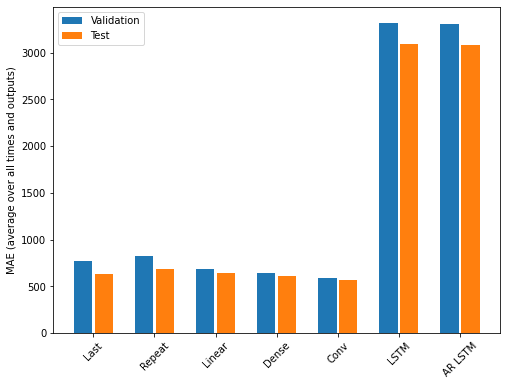

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 630.4671
Repeat  : 685.8378
Linear  : 641.0292
Dense   : 612.1821
Conv    : 567.5081
LSTM    : 3091.1418
AR LSTM : 3077.0156


**This would be the results for forecasting the NFH column using the same**

### **NFL-column Time Series Forecasting**

**As discussed earlier since this is a pipeline model consideration hence we would assume that NFH column is present during NFL time series forecasting**

In [ ]:
train_df=train_df1.copy()
val_df=val_df1.copy()
test_df=test_df1.copy()
num_features = train_df.shape[1] 

In [ ]:
num_features

24

In [ ]:
train_df

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,nfh,nfl
0,12115.673242,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,-3.371804e-12,1.0,0.015052,0.999887,12177.119957,12151.571552
1,12195.406448,12251.196928,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.2,879.0,973.0,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,9.267350e-13,1.0,0.032250,0.999480,12275.487382,12173.355954
2,12272.929018,12228.903255,3732.00,3835.84,-103.84,3778.78,3802.48,-23.7,360.0,1502.0,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,-7.295644e-13,1.0,0.083765,0.996486,12299.127043,12181.887534
3,12237.309351,12051.960005,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,-1.098294e-11,1.0,0.100894,0.994897,12242.227141,12030.371144
4,12149.137851,12017.343536,4109.04,4624.89,-515.85,5162.02,4413.62,748.4,725.0,1109.0,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,-6.684402e-12,1.0,0.117994,0.993014,12192.474725,11985.555622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,14332.220114,14231.671710,13171.18,7141.35,6029.83,4792.70,7165.24,-2372.54,1074.0,887.0,-0.21,0.0692,-0.30,2.01,-0.1293,0.3506,-0.80,-0.810001,-5.026111e-12,1.0,0.130923,0.991393,14340.116998,14188.548816
244,14346.763360,14362.598633,9652.29,6513.39,3138.90,4496.85,7106.98,-2610.13,778.0,1210.0,-0.27,-0.5692,0.65,2.09,0.1693,-0.0772,-0.45,2.520000,-6.682411e-12,1.0,0.181890,0.983319,14417.986966,14274.102292
245,14497.945979,14512.846556,9354.82,8783.35,571.47,5556.61,6891.11,-1334.5,1037.0,917.0,0.83,0.1700,2.18,1.02,-0.2105,0.2796,0.02,-0.750000,-2.383872e-12,1.0,0.198778,0.980044,14537.844661,14418.999666
246,14555.672254,14626.855537,10263.57,8384.51,1879.06,5777.20,8147.37,-2370.17,667.0,1309.0,-0.52,-0.1018,-1.01,0.57,-0.1940,-0.0230,0.06,-1.120001,-1.263725e-11,1.0,0.215608,0.976480,14648.152613,14508.967604


**Window Generator**

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['nfl'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['nfl']

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['nfl'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['nfl']

**Splitting Window**

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]).astype(np.float32),
                           np.array(train_df[100:100+w2.total_window_size]).astype(np.float32),
                           np.array(train_df[200:200+w2.total_window_size]).astype(np.float32)])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 24)
Inputs shape: (3, 6, 24)
labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs, example_labels

In [ ]:
w2.example

(<tf.Tensor: shape=(3, 6, 24), dtype=float32, numpy=
 array([[[ 1.21156729e+04,  1.22162725e+04,  2.67078003e+03,
           1.98202002e+03,  6.88760010e+02,  3.49015991e+03,
           3.42620996e+03,  6.39500008e+01,  1.35600000e+03,
           4.82000000e+02, -9.99999978e-03,  3.97000015e-01,
          -9.80000019e-01,  7.20000029e-01, -5.20000011e-02,
           3.99000011e-02, -1.00000001e-01, -1.30999947e+00,
          -3.37180370e-12,  1.00000000e+00,  1.50518613e-02,
           9.99886692e-01,  1.21771201e+04,  1.21515713e+04],
         [ 1.21954062e+04,  1.22511973e+04,  4.51435010e+03,
           3.25130005e+03,  1.26305005e+03,  2.75087012e+03,
           3.78007007e+03, -1.02919995e+03,  8.79000000e+02,
           9.73000000e+02, -2.30000004e-01, -5.09999990e-01,
          -1.33000004e+00,  4.60000008e-01,  4.42999989e-01,
           5.64800024e-01,  7.99999982e-02,  1.55000019e+00,
           9.26734926e-13,  1.00000000e+00,  3.22496146e-02,
           9.99479830e-01,  1.2

In [ ]:
def plot(self, model=None, plot_col='nfl', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

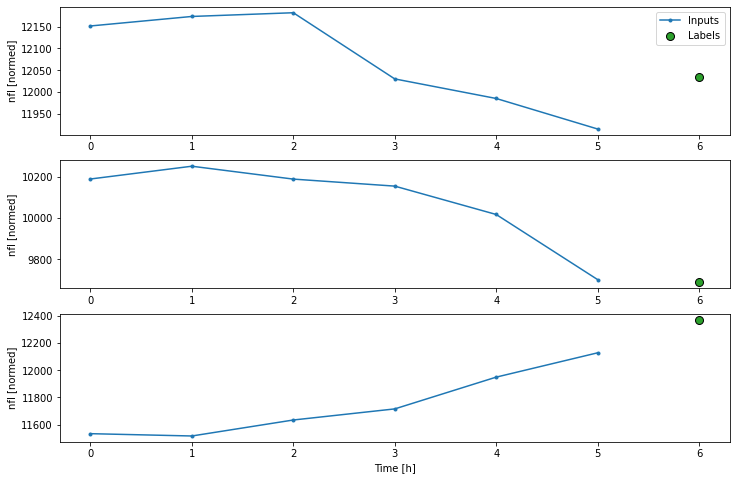

In [ ]:
w2.plot()

**Creating Dataset for Model**

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

**Creating windows for training ,testing and validation based on train ,test val dataset**

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 6, 24), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 24)
Labels shape (batch, time, features): (32, 1, 1)


## **Model Training/Evaluation (Time series forecasting for columns='nfl')**

### **Single Step Time Forecasting Models**

In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['nfl'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['nfl']

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 24)
Labels shape (batch, time, features): (32, 1, 1)


#### **BaseLine Model**

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices['nfl'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 3ms/step - loss: 28204.5449 - mean_absolute_error: 130.9248


In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['nfl'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['nfl']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 24)
Output shape: (32, 24, 1)


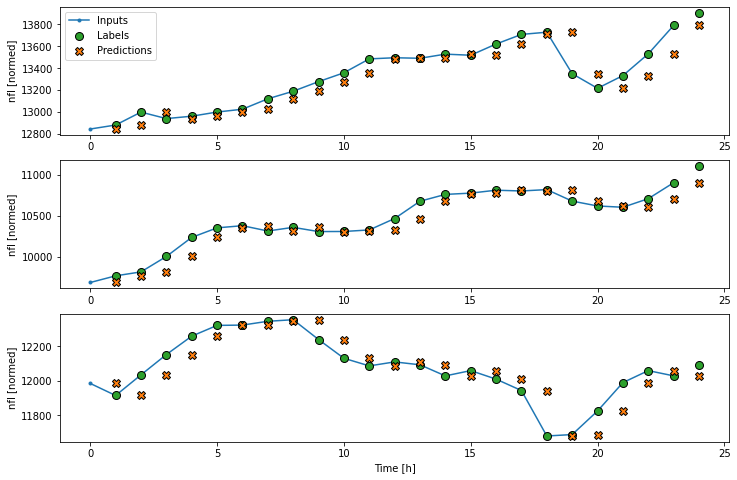

In [ ]:
wide_window.plot(baseline)

**Since we had already defined the Compile function before hence we shall just call the same when executing the algorithms**

#### **Linear Model**

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 24)
Output shape: (32, 24, 1)


In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/250
8/8 [==============================] - 1s 26ms/step - loss: 88427464.0000 - mean_absolute_error: 9214.2148 - val_loss: 134344880.0000 - val_mean_absolute_error: 11479.5781
Epoch 2/250
8/8 [==============================] - 0s 10ms/step - loss: 78774552.0000 - mean_absolute_error: 8673.9824 - val_loss: 118914712.0000 - val_mean_absolute_error: 10777.5508
Epoch 3/250
8/8 [==============================] - 0s 9ms/step - loss: 70022632.0000 - mean_absolute_error: 8150.1782 - val_loss: 104669784.0000 - val_mean_absolute_error: 10085.2061
Epoch 4/250
8/8 [==============================] - 0s 11ms/step - loss: 62097180.0000 - mean_absolute_error: 7637.6787 - val_loss: 91687504.0000 - val_mean_absolute_error: 9408.6553
Epoch 5/250
8/8 [==============================] - 0s 9ms/step - loss: 54754836.0000 - mean_absolute_error: 7146.9707 - val_loss: 80187536.0000 - val_mean_absolute_error: 8765.3770
Epoch 6/250
8/8 [==============================] - 0s 12ms/step - loss: 48270148.0000 

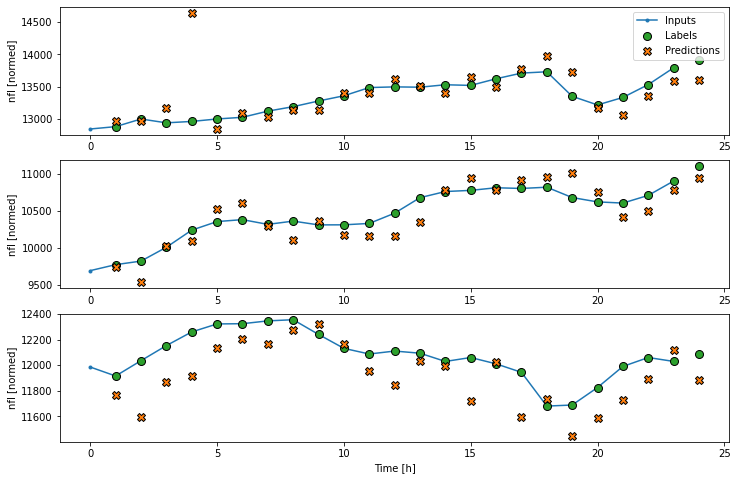

In [ ]:
wide_window.plot(linear)

#### **Dense Model**

In [ ]:
tot=24
num_features=tot-1
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/250
8/8 [==============================] - 1s 41ms/step - loss: 31963142.0000 - mean_absolute_error: 4568.2295 - val_loss: 1643883.2500 - val_mean_absolute_error: 667.9697
Epoch 2/250
8/8 [==============================] - 0s 15ms/step - loss: 6510048.0000 - mean_absolute_error: 2182.1689 - val_loss: 1867986.2500 - val_mean_absolute_error: 1318.5100
Epoch 3/250
8/8 [==============================] - 0s 15ms/step - loss: 1721905.6250 - mean_absolute_error: 1096.9019 - val_loss: 156328.7344 - val_mean_absolute_error: 261.5219
Epoch 4/250
8/8 [==============================] - 0s 16ms/step - loss: 610579.3125 - mean_absolute_error: 632.3807 - val_loss: 139436.2344 - val_mean_absolute_error: 265.7839
Epoch 5/250
8/8 [==============================] - 0s 15ms/step - loss: 218585.3750 - mean_absolute_error: 389.9702 - val_loss: 292676.0625 - val_mean_absolute_error: 473.7858
Epoch 6/250
8/8 [==============================] - 0s 15ms/step - loss: 114197.2891 - mean_absolute_error: 262

#### **Multi Step Dense Model**

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['nfl'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['nfl']

Text(0.5, 1.0, 'Given 3h as input, predict 1h into the future.')

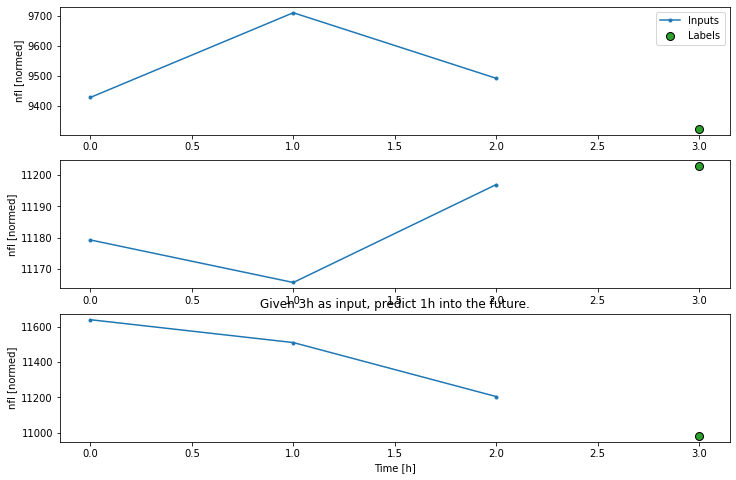

In [ ]:
conv_window.plot()
plt.title("Given 3h as input, predict 1h into the future.")

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=320, activation='relu'),
    tf.keras.layers.Dense(units=640, activation='relu'),
    tf.keras.layers.Dense(units=960, activation='relu'),
    tf.keras.layers.Dense(units=1280, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 24)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

3/3 [==============================] - 0s 8ms/step - loss: 527864.9375 - mean_absolute_error: 635.5417


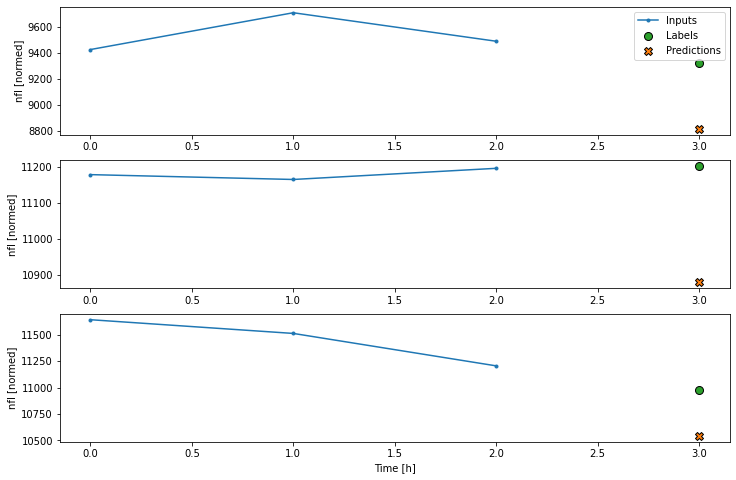

In [ ]:
conv_window.plot(multi_step_dense)

In [ ]:
print('Input shape:', wide_window.example[0].shape)

Input shape: (32, 24, 24)


#### **Convolutional Neural Network Model**

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=15000,kernel_size=(CONV_WIDTH,),activation='relu'),
    tf.keras.layers.Dense(units=12500, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 24)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

3/3 [==============================] - 1s 246ms/step - loss: 184989.2812 - mean_absolute_error: 362.7686


In [ ]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 24)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [ ]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['nfl'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['nfl']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 24)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


In [ ]:
wide_conv_window.plot(conv_model)

#### **Recurrent neural network Model**

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(96, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(200, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 24)
Output shape: (32, 24, 1)


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 32ms/step - loss: 205549504.0000 - mean_absolute_error: 14332.7246


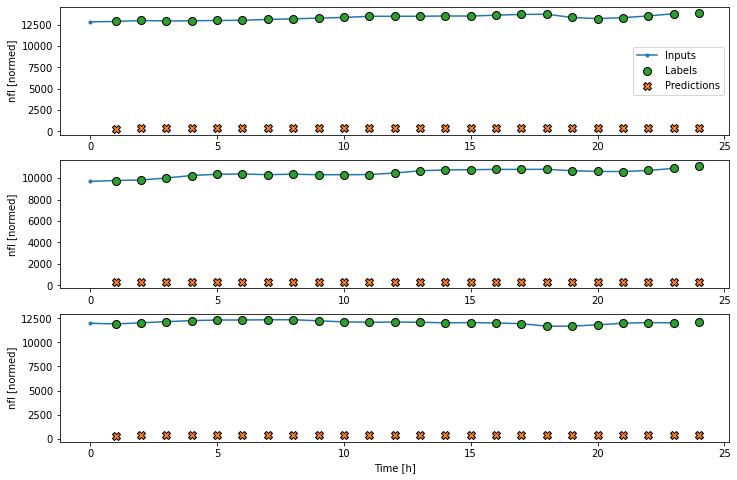

In [ ]:
wide_window.plot(lstm_model)

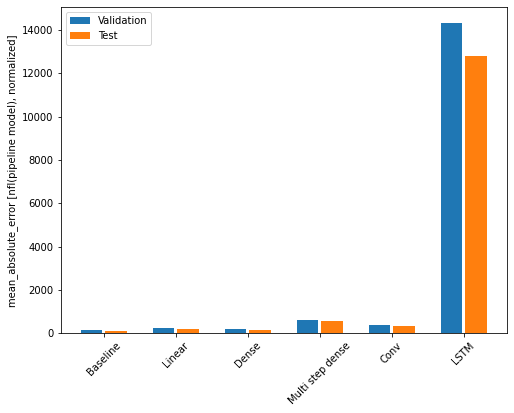

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [nfl(pipeline model), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 95.5032
Linear      : 215.4794
Dense       : 166.3866
Multi step dense: 576.9311
Conv        : 351.0435
LSTM        : 12816.5215


### **Multi-output Time Forecasting models**

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 24)
Labels shape (batch, time, features): (32, 24, 24)


#### **BaseLine Model**

In [ ]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 8ms/step - loss: 5653406.5000 - mean_absolute_error: 623.5735


In [ ]:
num_features = train_df.shape[1] 

dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])


In [ ]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 8ms/step - loss: 2522571.0000 - mean_absolute_error: 618.0967


#### **RNN Model**

In [ ]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

2/2 [==============================] - 0s 11ms/step - loss: 49285808.0000 - mean_absolute_error: 3889.0305

CPU times: user 57.6 s, sys: 4.17 s, total: 1min 1s
Wall time: 1min 6s


### **Model Performance Chart**

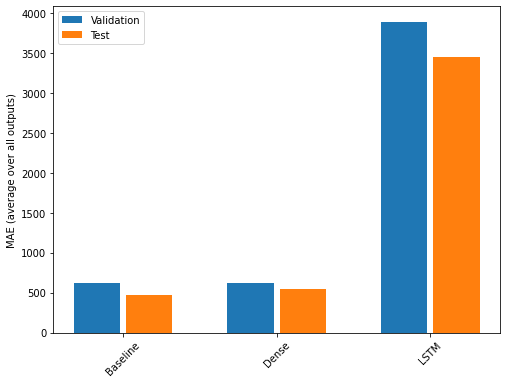

In [ ]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 467.2124
Dense          : 545.4773
LSTM           : 3452.2759


### **Multi-step models**

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

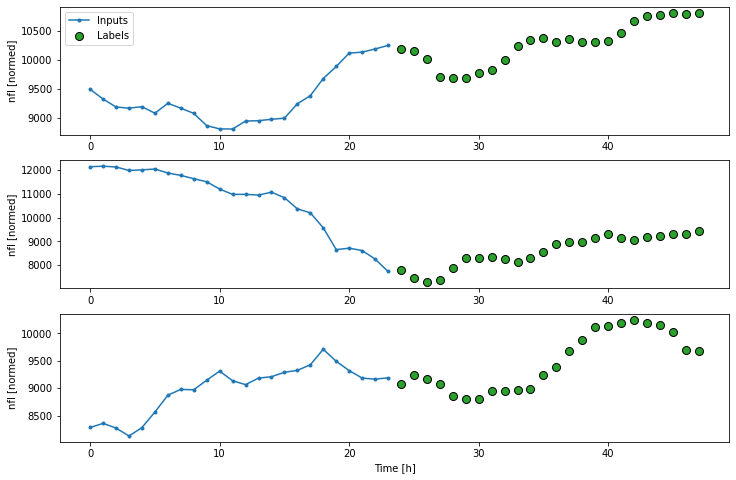

In [ ]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

#### **Baseline Model**

1/1 [==============================] - 0s 113ms/step - loss: 6900186.0000 - mean_absolute_error: 745.5283


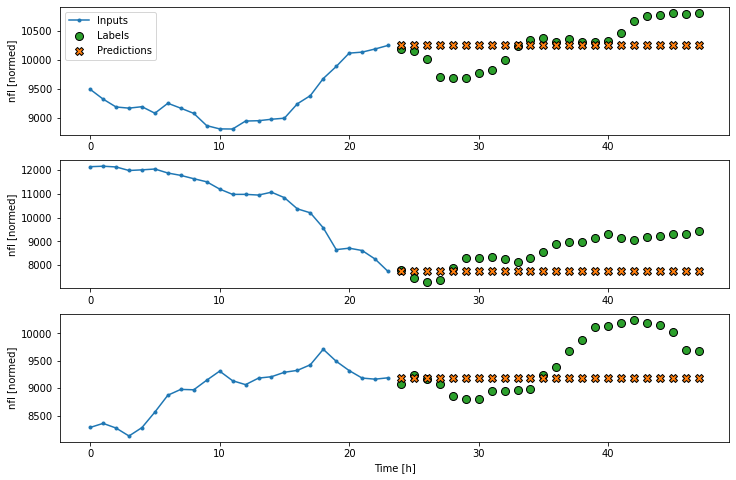

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

1/1 [==============================] - 0s 94ms/step - loss: 6660963.5000 - mean_absolute_error: 754.4710


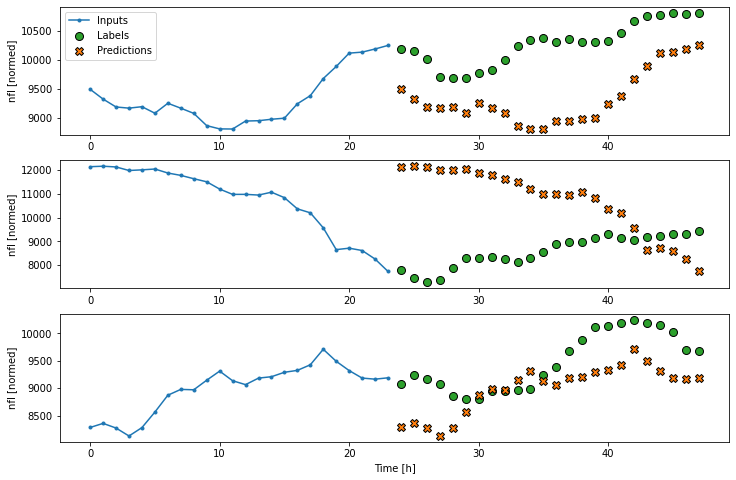

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### **Single-shot models**

#### **Multi Linear Model**

1/1 [==============================] - 0s 47ms/step - loss: 2346977.2500 - mean_absolute_error: 692.5042


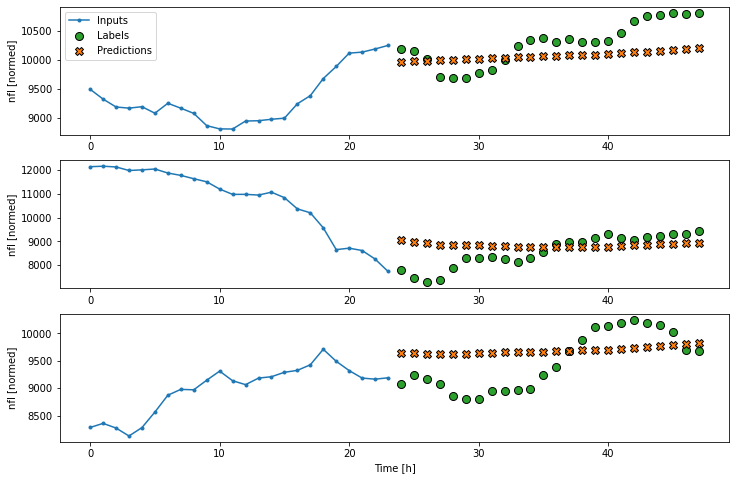

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

#### **Dense Model**

1/1 [==============================] - 0s 42ms/step - loss: 2218993.7500 - mean_absolute_error: 641.4389


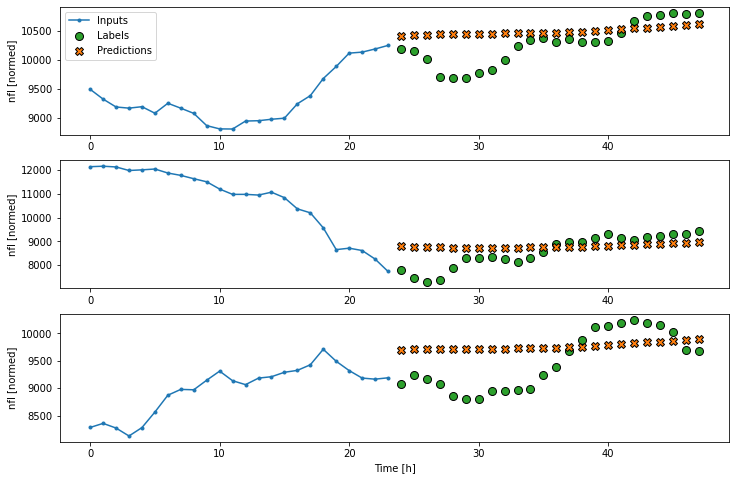

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

#### **CNN Model**

1/1 [==============================] - 0s 47ms/step - loss: 1928302.6250 - mean_absolute_error: 555.9616


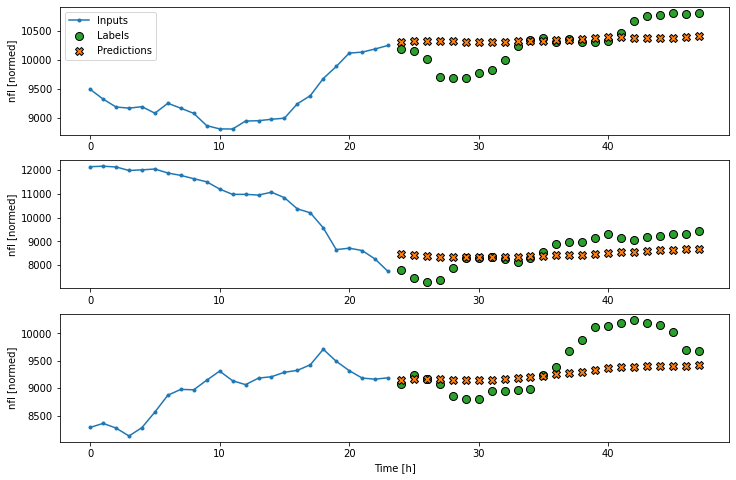

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

#### **RNN Model**

1/1 [==============================] - 0s 50ms/step - loss: 46193068.0000 - mean_absolute_error: 3780.4062


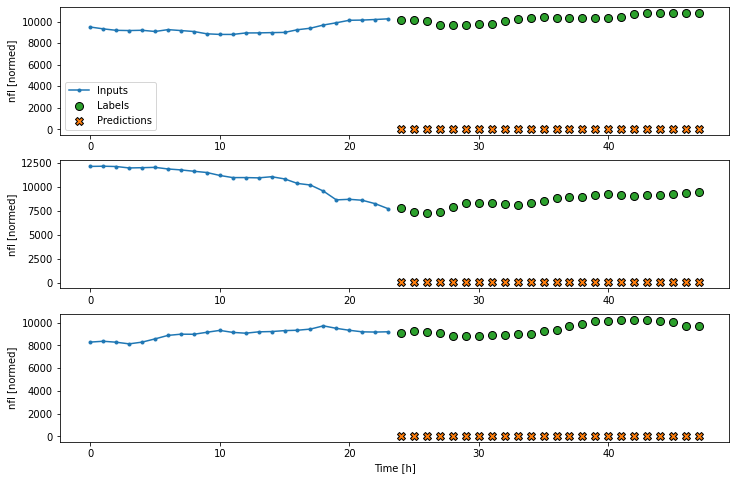

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### **Autoregressive model**

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 24])

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 24)


1/1 [==============================] - 0s 54ms/step - loss: 45927404.0000 - mean_absolute_error: 3766.7969


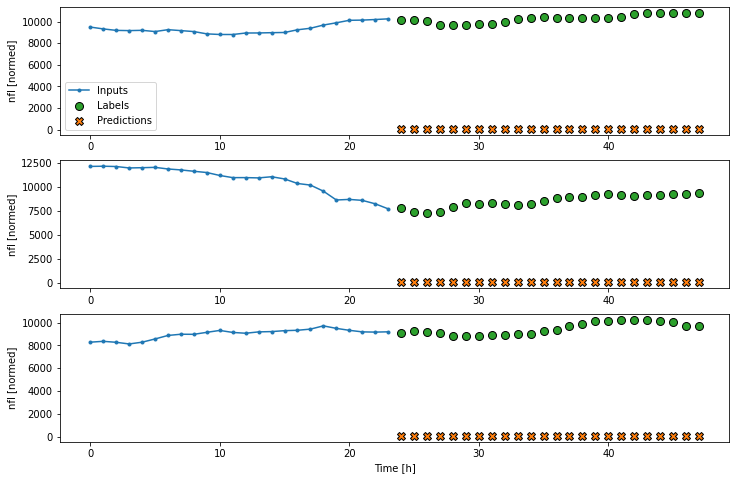

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

### **Model Performance Chart**



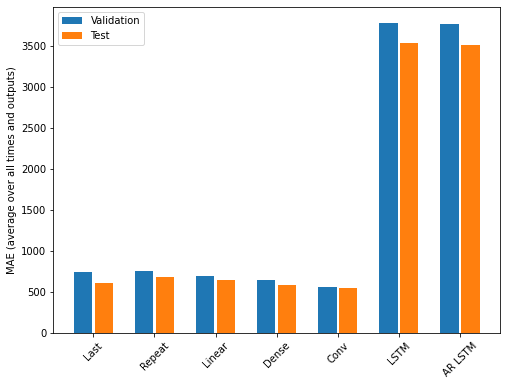

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 614.9040
Repeat  : 686.4363
Linear  : 651.0955
Dense   : 589.7288
Conv    : 547.1092
LSTM    : 3525.1482
AR LSTM : 3509.7244


**This would be the results for forecasting the NFL column based on other columns including NFH column**

**Conclusion of Dependent Model Analysis: Here in this model we can see that the mae rate of all LSTM/RNN algorithms tops the list and only algorithms involving dense/conv network shows low loss compared to others hence if in future we require to construct such a model we could go ahead with dense network implementation ,also updating number of neurons ,optimizers etc to reduce the mae loss, but it would be strongly recommended to follow the scaling procedure, which would easily avoid the same and bring down the mae values to a considerable amount, link to the colab notebook is given at the end of notebook.**

Note: this loss is due to the fact that data set is regession based and mainly due to the fact that values arent scaled properly in dataset**

## **Independent Model Algorithm**

### **NFH-column Time Series Forecasting**

In [ ]:
train_df=train_df1.drop(columns=['nfl'])
test_df=test_df1.drop(columns=['nfl'])
val_df=val_df1.drop(columns=['nfl'])
num_features = train_df.shape[1] 

In [ ]:
num_features

23

In [ ]:
train_df

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,nfh
0,12115.673242,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,-3.371804e-12,1.0,0.015052,0.999887,12177.119957
1,12195.406448,12251.196928,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.2,879.0,973.0,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,9.267350e-13,1.0,0.032250,0.999480,12275.487382
2,12272.929018,12228.903255,3732.00,3835.84,-103.84,3778.78,3802.48,-23.7,360.0,1502.0,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,-7.295644e-13,1.0,0.083765,0.996486,12299.127043
3,12237.309351,12051.960005,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,-1.098294e-11,1.0,0.100894,0.994897,12242.227141
4,12149.137851,12017.343536,4109.04,4624.89,-515.85,5162.02,4413.62,748.4,725.0,1109.0,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,-6.684402e-12,1.0,0.117994,0.993014,12192.474725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,14332.220114,14231.671710,13171.18,7141.35,6029.83,4792.70,7165.24,-2372.54,1074.0,887.0,-0.21,0.0692,-0.30,2.01,-0.1293,0.3506,-0.80,-0.810001,-5.026111e-12,1.0,0.130923,0.991393,14340.116998
244,14346.763360,14362.598633,9652.29,6513.39,3138.90,4496.85,7106.98,-2610.13,778.0,1210.0,-0.27,-0.5692,0.65,2.09,0.1693,-0.0772,-0.45,2.520000,-6.682411e-12,1.0,0.181890,0.983319,14417.986966
245,14497.945979,14512.846556,9354.82,8783.35,571.47,5556.61,6891.11,-1334.5,1037.0,917.0,0.83,0.1700,2.18,1.02,-0.2105,0.2796,0.02,-0.750000,-2.383872e-12,1.0,0.198778,0.980044,14537.844661
246,14555.672254,14626.855537,10263.57,8384.51,1879.06,5777.20,8147.37,-2370.17,667.0,1309.0,-0.52,-0.1018,-1.01,0.57,-0.1940,-0.0230,0.06,-1.120001,-1.263725e-11,1.0,0.215608,0.976480,14648.152613


**Window generator**

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w1 = WindowGenerator(input_width=23, label_width=1, shift=23,
                     label_columns=['nfh'])
w1

Total window size: 46
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label indices: [45]
Label column name(s): ['nfh']

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['nfh'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['nfh']

**Splitting Window**

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]).astype(np.float32),
                           np.array(train_df[100:100+w2.total_window_size]).astype(np.float32),
                           np.array(train_df[200:200+w2.total_window_size]).astype(np.float32)])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 23)
Inputs shape: (3, 6, 23)
labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs, example_labels

**Data Visualization of Window Plot**

In [ ]:
def plot(self, model=None, plot_col='nfh', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

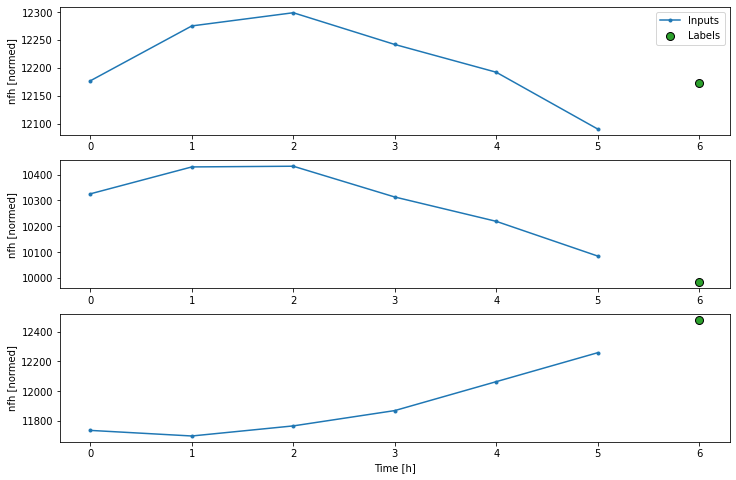

In [ ]:
w2.plot()

**Dataset Preparation for Model prediction**

**Creating windows for training ,testing and validation based on train ,test val dataset**

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 6, 23), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 23)
Labels shape (batch, time, features): (32, 1, 1)


In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['nfh'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['nfh']

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 23)
Labels shape (batch, time, features): (32, 1, 1)


## **Model Training/Evaluation (Time series forecasting for columns='nfh')**

### **Single Step Time Forecasting Models**

#### **BaseLine model**

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices['nfh'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 5ms/step - loss: 18227.2598 - mean_absolute_error: 107.7853


In [ ]:
wide_window = WindowGenerator(
    input_width=23, label_width=23, shift=1,
    label_columns=['nfh'])

wide_window

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label column name(s): ['nfh']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 23, 23)
Output shape: (32, 23, 1)


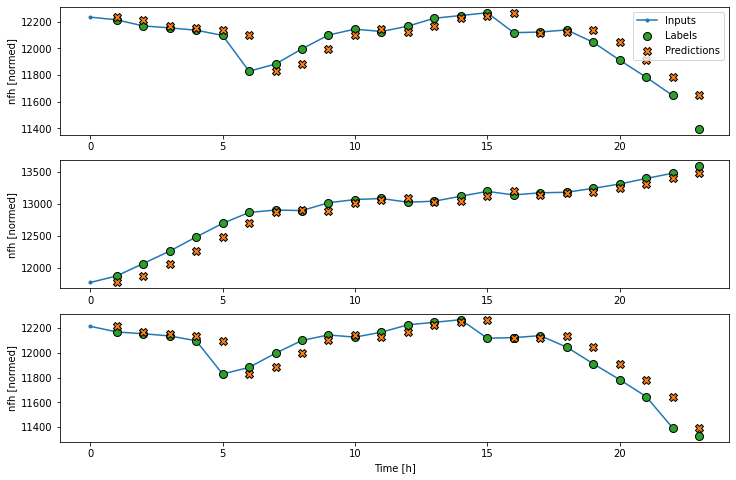

In [ ]:
wide_window.plot(baseline)

#### **Compile Function for CNN,Linear,RNN and Dense Model**

In [ ]:
MAX_EPOCHS = 250 # I have given limited the maximum epocj=hs to this so as to observe the results for this dataset, since i havent performed the featured scaling and this dataset being regression based , the mean squared error recorded for each algorithm under the same would be high hence to scale it down , i have given this amount of epochs,dont worry sir after a poin the algorithm would cut offso hence it wont be time consuming during training sir

# Since this a regresion based dataset hence this would be the parameters required to perform the same
def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

#### **Linear model**

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 23)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/250
8/8 [==============================] - 1s 22ms/step - loss: 170074976.0000 - mean_absolute_error: 12927.7695 - val_loss: 264240560.0000 - val_mean_absolute_error: 16230.5049
Epoch 2/250
8/8 [==============================] - 0s 9ms/step - loss: 157812816.0000 - mean_absolute_error: 12458.3867 - val_loss: 245277248.0000 - val_mean_absolute_error: 15636.9414
Epoch 3/250
8/8 [==============================] - 0s 9ms/step - loss: 146165952.0000 - mean_absolute_error: 11992.3350 - val_loss: 227170960.0000 - val_mean_absolute_error: 15048.1895
Epoch 4/250
8/8 [==============================] - 0s 9ms/step - loss: 135200304.0000 - mean_absolute_error: 11533.4922 - val_loss: 209987328.0000 - val_mean_absolute_error: 14466.9844
Epoch 5/250
8/8 [==============================] - 0s 9ms/step - loss: 124637456.0000 - mean_absolute_error: 11079.0000 - val_loss: 193849968.0000 - val_mean_absolute_error: 13898.8066
Epoch 6/250
8/8 [==============================] - 0s 10ms/step - loss: 11

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 23, 23)
Output shape: (32, 23, 1)


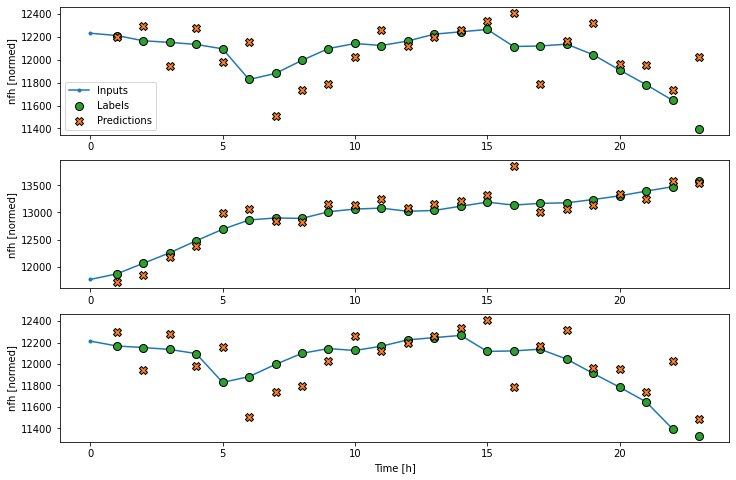

In [ ]:
wide_window.plot(linear)

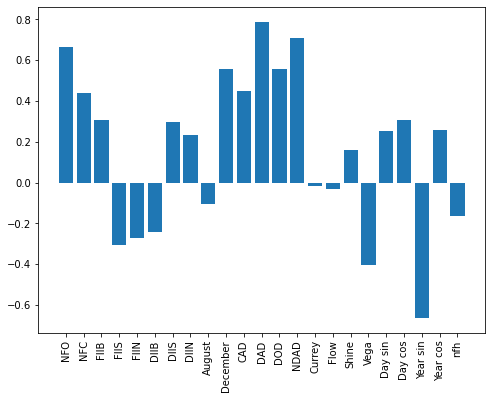

In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

#### **Dense Model**

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/250
8/8 [==============================] - 1s 46ms/step - loss: 37544396.0000 - mean_absolute_error: 4534.6294 - val_loss: 1283318.1250 - val_mean_absolute_error: 963.4352
Epoch 2/250
8/8 [==============================] - 0s 16ms/step - loss: 2407039.5000 - mean_absolute_error: 1317.6901 - val_loss: 692554.0625 - val_mean_absolute_error: 734.5095
Epoch 3/250
8/8 [==============================] - 0s 14ms/step - loss: 750712.8125 - mean_absolute_error: 738.8251 - val_loss: 1473856.5000 - val_mean_absolute_error: 1158.5479
Epoch 4/250
8/8 [==============================] - 0s 14ms/step - loss: 447087.6250 - mean_absolute_error: 526.1339 - val_loss: 288186.5000 - val_mean_absolute_error: 471.2872
Epoch 5/250
8/8 [==============================] - 0s 14ms/step - loss: 140043.3594 - mean_absolute_error: 294.1335 - val_loss: 98305.2344 - val_mean_absolute_error: 235.7283
Epoch 6/250
8/8 [==============================] - 0s 13ms/step - loss: 75828.7969 - mean_absolute_error: 201.536

#### **Multi Step Dense Model**

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['nfh'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['nfh']

Text(0.5, 1.0, 'Given 3h as input, predict 1h into the future.')

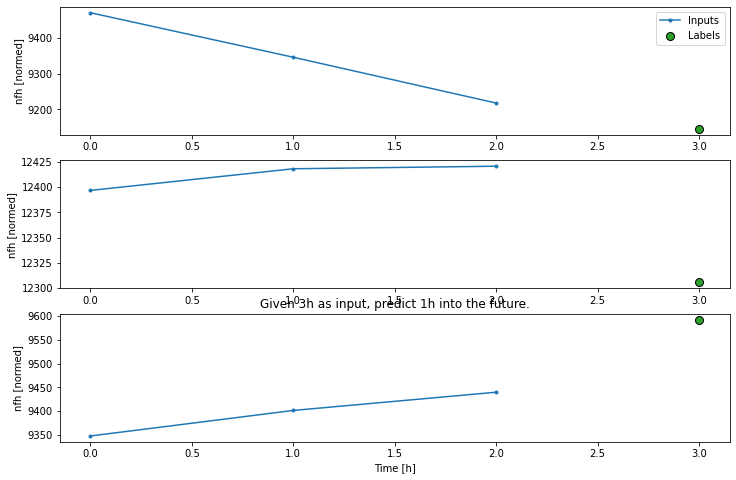

In [ ]:
conv_window.plot()
plt.title("Given 3h as input, predict 1h into the future.")

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=320, activation='relu'),
    tf.keras.layers.Dense(units=640, activation='relu'),
    tf.keras.layers.Dense(units=960, activation='relu'),
    tf.keras.layers.Dense(units=1280, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 23)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

3/3 [==============================] - 0s 7ms/step - loss: 1184875.0000 - mean_absolute_error: 1049.7043


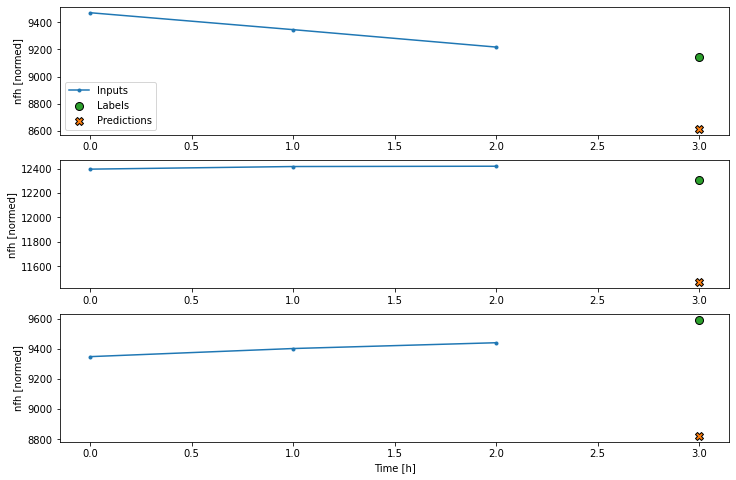

In [ ]:
conv_window.plot(multi_step_dense)

In [ ]:
print('Input shape:', wide_window.example[0].shape)

Input shape: (32, 23, 23)


#### **Convolutional Neural Network Model**

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=15000,kernel_size=(CONV_WIDTH,),activation='relu'),
    tf.keras.layers.Dense(units=12500, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 23)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

3/3 [==============================] - 1s 243ms/step - loss: 217554.9062 - mean_absolute_error: 413.4382


In [ ]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 23, 23)
Labels shape: (32, 23, 1)
Output shape: (32, 21, 1)


In [ ]:
LABEL_WIDTH = 23
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['nfh'])

wide_conv_window

Total window size: 26
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
Label column name(s): ['nfh']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 25, 23)
Labels shape: (32, 23, 1)
Output shape: (32, 23, 1)


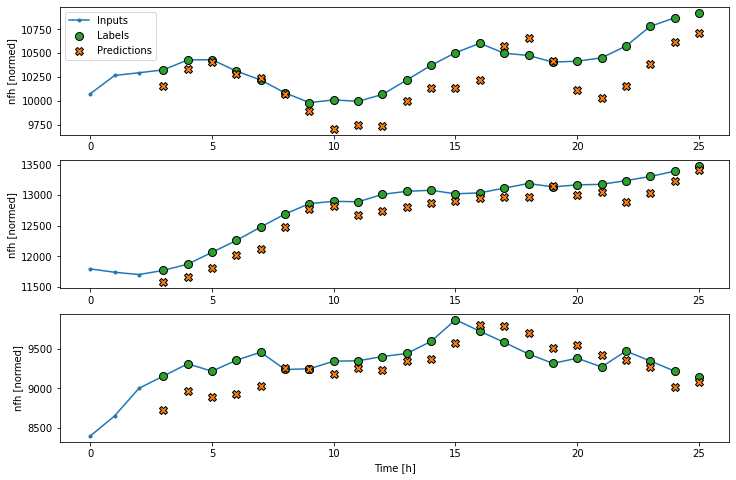

In [ ]:
wide_conv_window.plot(conv_model)

#### **Recurrent Neural Network**

**Note : Since RNN records the maximum Mean Squared error( in range :10,000 to 15,000)for any given of epochs for the dataset which hasnt' been scaled ,hence i have taken the liberty to acknowldege the same**

**This happens due to the main fact that the values in the dataset arent in proper scale meaning like all under same type as mentioned earlier**

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(96, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(200, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 23, 23)
Output shape: (32, 23, 1)


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 27ms/step - loss: 210663504.0000 - mean_absolute_error: 14510.9434


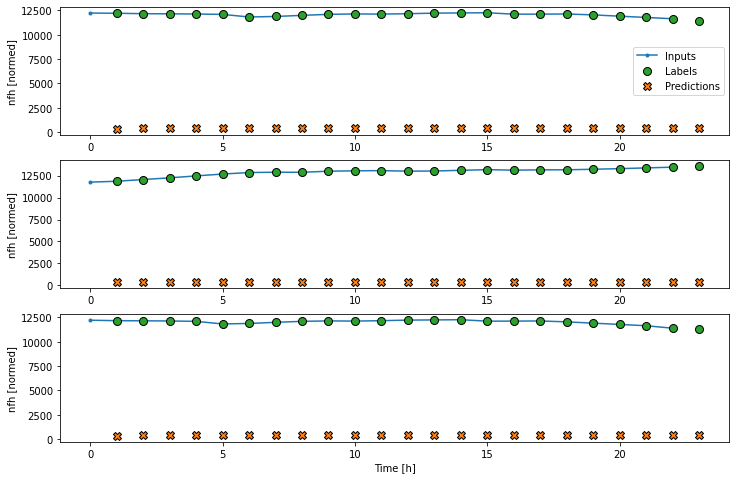

In [ ]:
wide_window.plot(lstm_model)

### **Model Performance Chart**

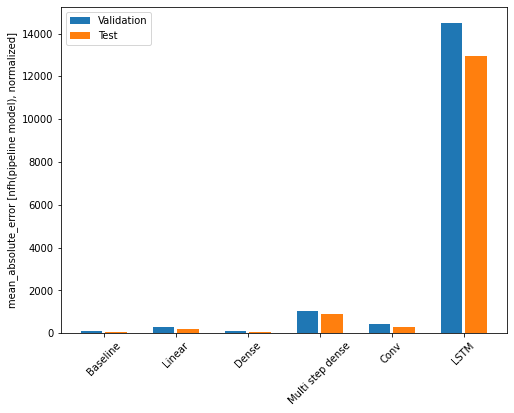

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [nfh(pipeline model), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 79.0395
Linear      : 223.3519
Dense       : 74.6347
Multi step dense: 884.5696
Conv        : 292.9517
LSTM        : 12931.6523


### **Multi Output Time Forecasting Models**

The models so far all predicted a single output feature, `nfh`, for a single time step.

All of these models can be converted to predict multiple features just by changing the number of units in the output layer and adjusting the training windows to include all features in the `labels`, 

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=23, label_width=23, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 23, 23)
Labels shape (batch, time, features): (32, 23, 23)


#### **Baseline Model**

In [ ]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 8ms/step - loss: 5792672.0000 - mean_absolute_error: 639.6846


In [ ]:
num_features = train_df.shape[1] 
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])


In [ ]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 5ms/step - loss: 2711959.0000 - mean_absolute_error: 600.4464


#### **RNN Model**

In [ ]:
%%time
wide_window = WindowGenerator(
    input_width=23, label_width=23, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)


2/2 [==============================] - 0s 9ms/step - loss: 41944904.0000 - mean_absolute_error: 3415.8098
CPU times: user 59.2 s, sys: 4.27 s, total: 1min 3s
Wall time: 1min 6s


### **Model Performance Chart**

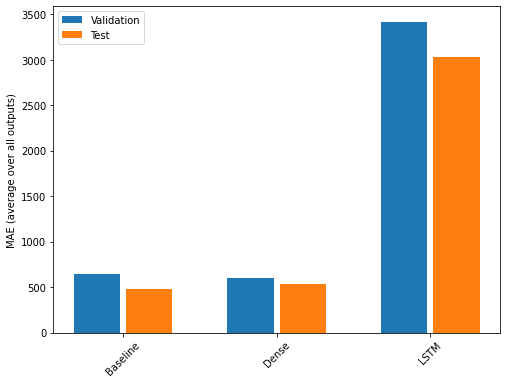

In [ ]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 483.4928
Dense          : 537.0026
LSTM           : 3027.8445


**Since the above models makes the time predictions under an hour basis for a single step , we can go with the multi step prediction which could performs with multiple steps**
The alogrithms are 

**1. Single shot predictions where the entire time series is predicted at once.**

**2. Autoregressive predictions where the model only makes single step predictions and its output is fed back as its input.**

### **Multi Step models**

Total window size: 46
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label indices: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Label column name(s): None

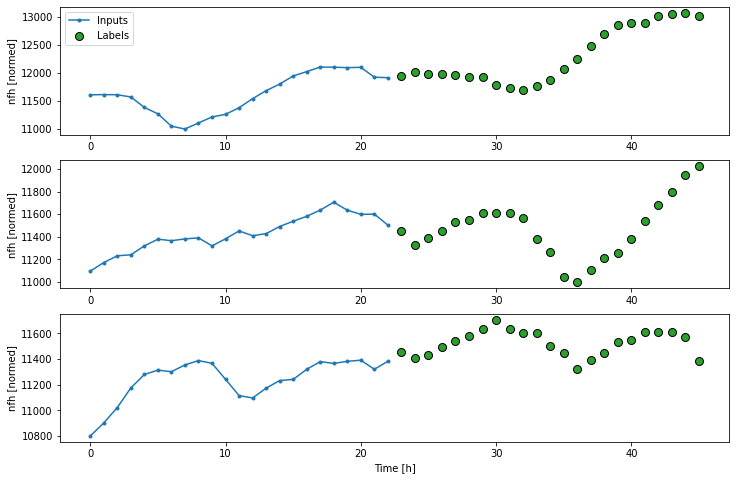

In [ ]:
OUT_STEPS = 23
multi_window = WindowGenerator(input_width=23,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

#### **Multi Step Baseline Model**

1/1 [==============================] - 0s 144ms/step - loss: 7016907.0000 - mean_absolute_error: 766.6168


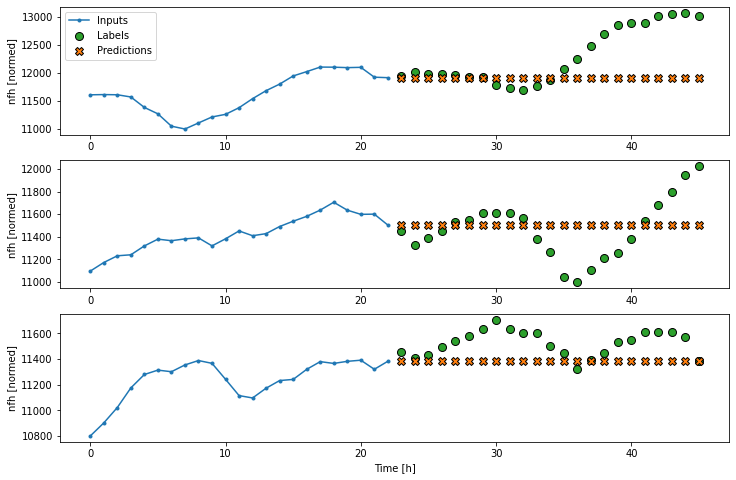

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

1/1 [==============================] - 0s 115ms/step - loss: 7676633.0000 - mean_absolute_error: 824.4334


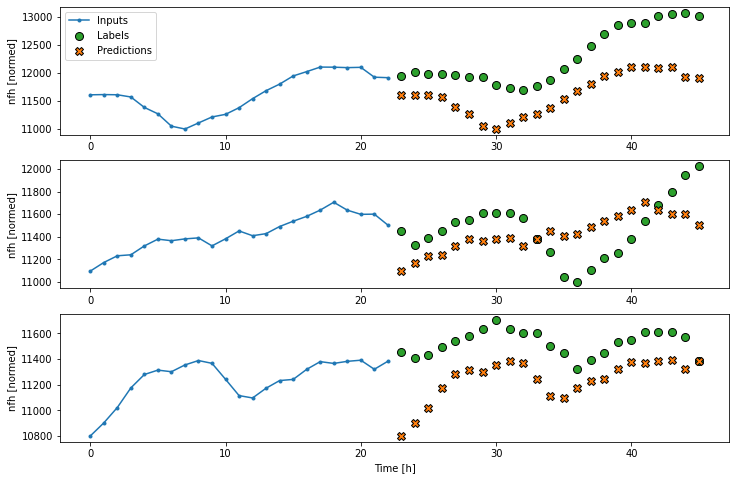

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### **Single Shot Models**

#### **Linear Model**

1/1 [==============================] - 0s 41ms/step - loss: 2445925.7500 - mean_absolute_error: 662.7532


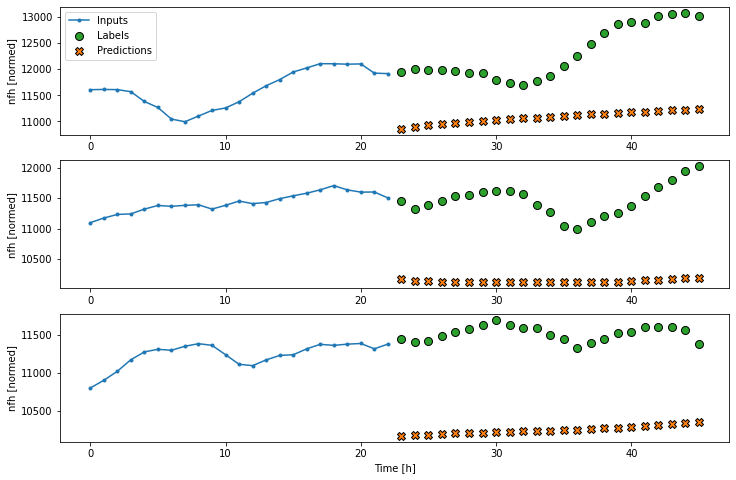

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

#### **Dense Model**

1/1 [==============================] - 0s 50ms/step - loss: 2394035.5000 - mean_absolute_error: 647.3638


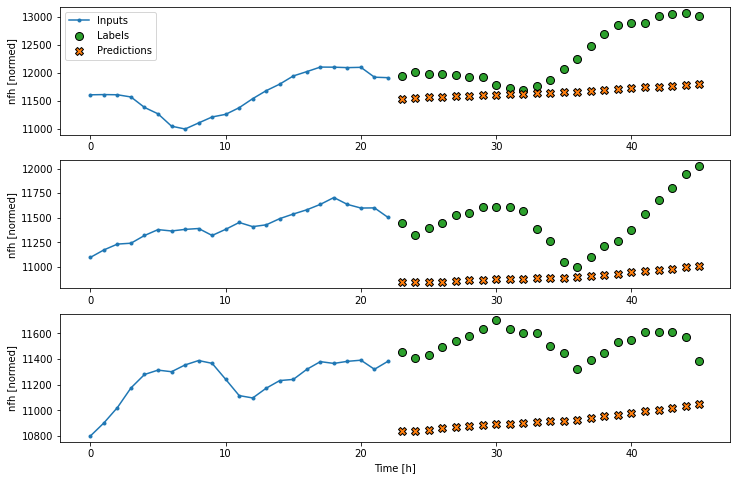

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

### **CNN Model**

1/1 [==============================] - 0s 55ms/step - loss: 2145692.2500 - mean_absolute_error: 581.5128


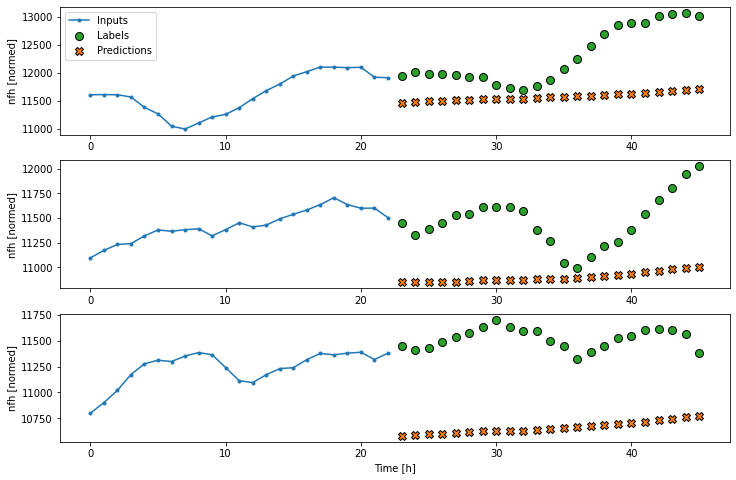

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

#### **RNN Model**

1/1 [==============================] - 0s 52ms/step - loss: 39271024.0000 - mean_absolute_error: 3320.5479


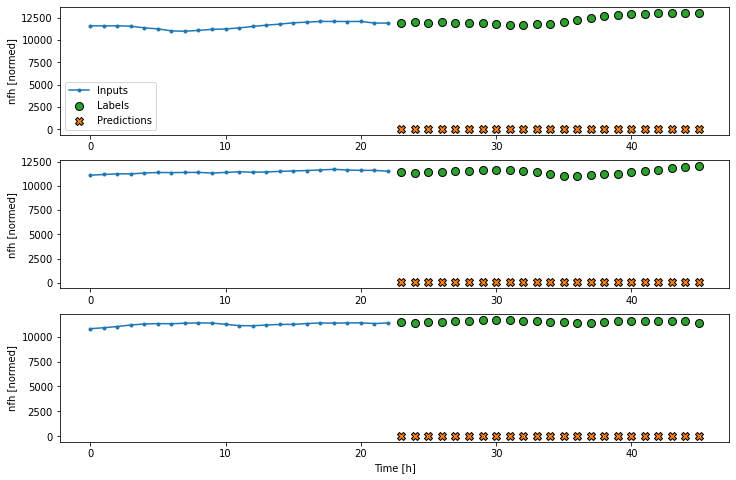

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### **Auto Regression models**

**RNN**

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 23])

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 23, 23)


1/1 [==============================] - 0s 57ms/step - loss: 39037732.0000 - mean_absolute_error: 3307.5518


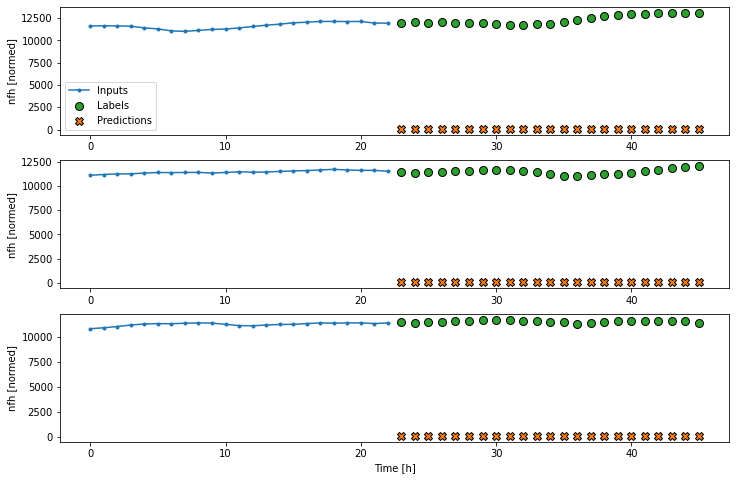

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

### **Model Performance Chart**

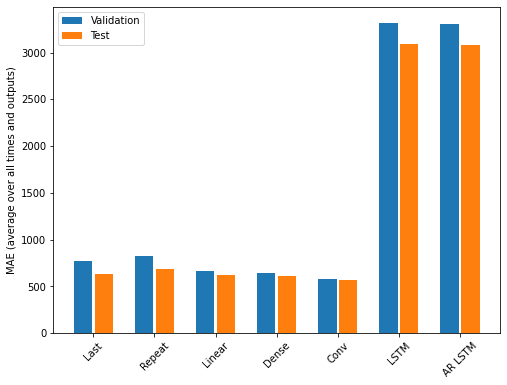

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 630.4671
Repeat  : 685.8379
Linear  : 621.1804
Dense   : 613.3672
Conv    : 566.4852
LSTM    : 3089.3940
AR LSTM : 3076.2520


**This would be the results for forecasting the NFH column using the same
Note: The results for forecasting NFH column would be the same as the results concluded by the dependent model**

### **NFL-column Time Series Forecasting**

**As discussed earlier since this is no such pipeline model consideration hence we would assume that NFH column is not present during NFL time series forecasting**

In [ ]:
train_df=train_df1.copy()
val_df=val_df1.copy()
test_df=test_df1.copy()

In [ ]:
train_df=train_df.drop(columns='nfh')
val_df=val_df.drop(columns='nfh')
test_df=test_df.drop(columns='nfh')
# to avoid certain dimension error hence i have taken the liberty to add a dummy column with extra zeroes so as to by pass the error and also i would like to point out that this wont affect the alogrithms performance in any way, the algorithm this type of error is the base line algorithm , if i remove the same sir then we would lose around 50 % of the algorithms,as most of the alogithms are base line models, from my perspective i see this as a run time error as due to the fact that this error appears in this section of the alogrithm and not else where sir, so kindly do consider the same sir 
train_df['dum']=0
val_df['dum']=0
test_df['dum']=0
train_df['NFL']=train_df['nfl']
val_df['NFL']=val_df['nfl']
test_df['NFL']=test_df['nfl']
train_df=train_df.drop(columns='nfl')
val_df=val_df.drop(columns='nfl')
test_df=test_df.drop(columns='nfl')
#renaming the same
train_df['nfl']=train_df['NFL']
val_df['nfl']=val_df['NFL']
test_df['nfl']=test_df['NFL']
train_df=train_df.drop(columns='NFL')
val_df=val_df.drop(columns='NFL')
test_df=test_df.drop(columns='NFL')
# The reason to perform the same is that ,it has been proven that moving the dependnt position to the last row would improves the algorithm's efficiency and hence we might expect good results( the same method followed last time)
num_features = train_df.shape[1] 

In [ ]:
num_features

24

In [ ]:
train_df

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,dum,nfl
0,12115.673242,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,-3.371804e-12,1.0,0.015052,0.999887,0,12151.571552
1,12195.406448,12251.196928,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.2,879.0,973.0,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,9.267350e-13,1.0,0.032250,0.999480,0,12173.355954
2,12272.929018,12228.903255,3732.00,3835.84,-103.84,3778.78,3802.48,-23.7,360.0,1502.0,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,-7.295644e-13,1.0,0.083765,0.996486,0,12181.887534
3,12237.309351,12051.960005,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,-1.098294e-11,1.0,0.100894,0.994897,0,12030.371144
4,12149.137851,12017.343536,4109.04,4624.89,-515.85,5162.02,4413.62,748.4,725.0,1109.0,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,-6.684402e-12,1.0,0.117994,0.993014,0,11985.555622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,14332.220114,14231.671710,13171.18,7141.35,6029.83,4792.70,7165.24,-2372.54,1074.0,887.0,-0.21,0.0692,-0.30,2.01,-0.1293,0.3506,-0.80,-0.810001,-5.026111e-12,1.0,0.130923,0.991393,0,14188.548816
244,14346.763360,14362.598633,9652.29,6513.39,3138.90,4496.85,7106.98,-2610.13,778.0,1210.0,-0.27,-0.5692,0.65,2.09,0.1693,-0.0772,-0.45,2.520000,-6.682411e-12,1.0,0.181890,0.983319,0,14274.102292
245,14497.945979,14512.846556,9354.82,8783.35,571.47,5556.61,6891.11,-1334.5,1037.0,917.0,0.83,0.1700,2.18,1.02,-0.2105,0.2796,0.02,-0.750000,-2.383872e-12,1.0,0.198778,0.980044,0,14418.999666
246,14555.672254,14626.855537,10263.57,8384.51,1879.06,5777.20,8147.37,-2370.17,667.0,1309.0,-0.52,-0.1018,-1.01,0.57,-0.1940,-0.0230,0.06,-1.120001,-1.263725e-11,1.0,0.215608,0.976480,0,14508.967604


**Window Generator**

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['nfl'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['nfl']

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['nfl'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['nfl']

**Splitting Window**

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]).astype(np.float32),
                           np.array(train_df[100:100+w2.total_window_size]).astype(np.float32),
                           np.array(train_df[200:200+w2.total_window_size]).astype(np.float32)])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 24)
Inputs shape: (3, 6, 24)
labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs, example_labels

In [ ]:
w2.example

(<tf.Tensor: shape=(3, 6, 24), dtype=float32, numpy=
 array([[[ 1.21156729e+04,  1.22162725e+04,  2.67078003e+03,
           1.98202002e+03,  6.88760010e+02,  3.49015991e+03,
           3.42620996e+03,  6.39500008e+01,  1.35600000e+03,
           4.82000000e+02, -9.99999978e-03,  3.97000015e-01,
          -9.80000019e-01,  7.20000029e-01, -5.20000011e-02,
           3.99000011e-02, -1.00000001e-01, -1.30999947e+00,
          -3.37180370e-12,  1.00000000e+00,  1.50518613e-02,
           9.99886692e-01,  0.00000000e+00,  1.21515713e+04],
         [ 1.21954062e+04,  1.22511973e+04,  4.51435010e+03,
           3.25130005e+03,  1.26305005e+03,  2.75087012e+03,
           3.78007007e+03, -1.02919995e+03,  8.79000000e+02,
           9.73000000e+02, -2.30000004e-01, -5.09999990e-01,
          -1.33000004e+00,  4.60000008e-01,  4.42999989e-01,
           5.64800024e-01,  7.99999982e-02,  1.55000019e+00,
           9.26734926e-13,  1.00000000e+00,  3.22496146e-02,
           9.99479830e-01,  0.0

In [ ]:
def plot(self, model=None, plot_col='nfl', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

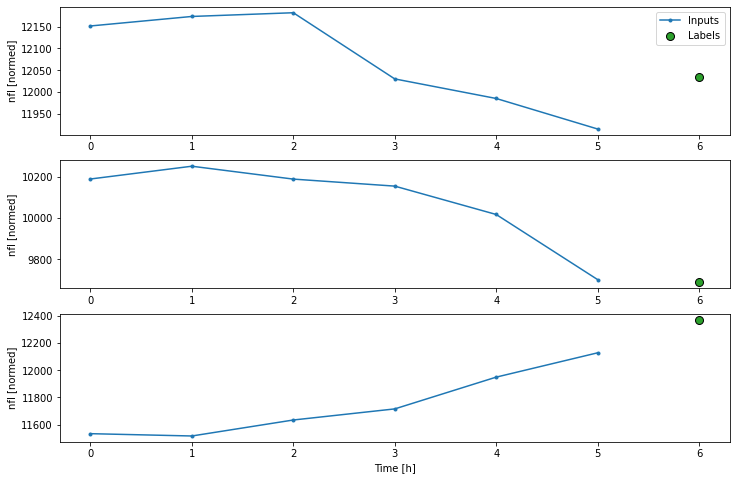

In [ ]:
w2.plot()

**Creating Dataset for Model**

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

**Creating windows for training ,testing and validation based on train ,test val dataset**

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 6, 24), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 24)
Labels shape (batch, time, features): (32, 1, 1)


## **Model Training/Evaluation (Time series forecasting for columns='nfl')**

### **Single Step Time Forecasting Models**

In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['nfl'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['nfl']

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 24)
Labels shape (batch, time, features): (32, 1, 1)


#### **BaseLine Model**

In [ ]:
single_step_window.test

<MapDataset shapes: ((None, 1, 24), (None, 1, 1)), types: (tf.float32, tf.float32)>

In [ ]:
train_df

,NFO,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega,Day sin,Day cos,Year sin,Year cos,dum,nfl
0,12115.673242,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999,-3.371804e-12,1.0,0.015052,0.999887,0,12151.571552
1,12195.406448,12251.196928,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.2,879.0,973.0,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000,9.267350e-13,1.0,0.032250,0.999480,0,12173.355954
2,12272.929018,12228.903255,3732.00,3835.84,-103.84,3778.78,3802.48,-23.7,360.0,1502.0,-0.17,0.0150,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000,-7.295644e-13,1.0,0.083765,0.996486,0,12181.887534
3,12237.309351,12051.960005,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000,-1.098294e-11,1.0,0.100894,0.994897,0,12030.371144
4,12149.137851,12017.343536,4109.04,4624.89,-515.85,5162.02,4413.62,748.4,725.0,1109.0,0.56,0.3050,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000,-6.684402e-12,1.0,0.117994,0.993014,0,11985.555622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,14332.220114,14231.671710,13171.18,7141.35,6029.83,4792.70,7165.24,-2372.54,1074.0,887.0,-0.21,0.0692,-0.30,2.01,-0.1293,0.3506,-0.80,-0.810001,-5.026111e-12,1.0,0.130923,0.991393,0,14188.548816
244,14346.763360,14362.598633,9652.29,6513.39,3138.90,4496.85,7106.98,-2610.13,778.0,1210.0,-0.27,-0.5692,0.65,2.09,0.1693,-0.0772,-0.45,2.520000,-6.682411e-12,1.0,0.181890,0.983319,0,14274.102292
245,14497.945979,14512.846556,9354.82,8783.35,571.47,5556.61,6891.11,-1334.5,1037.0,917.0,0.83,0.1700,2.18,1.02,-0.2105,0.2796,0.02,-0.750000,-2.383872e-12,1.0,0.198778,0.980044,0,14418.999666
246,14555.672254,14626.855537,10263.57,8384.51,1879.06,5777.20,8147.37,-2370.17,667.0,1309.0,-0.52,-0.1018,-1.01,0.57,-0.1940,-0.0230,0.06,-1.120001,-1.263725e-11,1.0,0.215608,0.976480,0,14508.967604


In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices['nfl'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 3ms/step - loss: 28204.5430 - mean_absolute_error: 130.9248


In [ ]:
wide_window = WindowGenerator(
    input_width=23, label_width=23, shift=1,
    label_columns=['nfl'])

wide_window

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label column name(s): ['nfl']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 23, 24)
Output shape: (32, 23, 1)


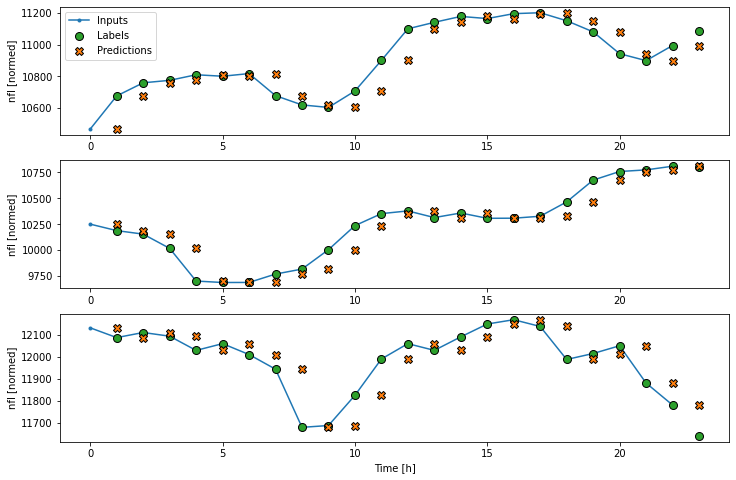

In [ ]:
wide_window.plot(baseline)

#### **Linear Model**

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 23, 24)
Output shape: (32, 23, 1)


In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/250
8/8 [==============================] - 1s 21ms/step - loss: 626637248.0000 - mean_absolute_error: 24800.3340 - val_loss: 1015059008.0000 - val_mean_absolute_error: 31821.8750
Epoch 2/250
8/8 [==============================] - 0s 9ms/step - loss: 603079616.0000 - mean_absolute_error: 24334.7051 - val_loss: 977557120.0000 - val_mean_absolute_error: 31229.6855
Epoch 3/250
8/8 [==============================] - 0s 9ms/step - loss: 579957120.0000 - mean_absolute_error: 23868.2090 - val_loss: 940982208.0000 - val_mean_absolute_error: 30640.9688
Epoch 4/250
8/8 [==============================] - 0s 10ms/step - loss: 557999808.0000 - mean_absolute_error: 23410.3711 - val_loss: 905069632.0000 - val_mean_absolute_error: 30051.5781
Epoch 5/250
8/8 [==============================] - 0s 10ms/step - loss: 535600448.0000 - mean_absolute_error: 22946.0195 - val_loss: 870642304.0000 - val_mean_absolute_error: 29475.3926
Epoch 6/250
8/8 [==============================] - 0s 10ms/step - loss:

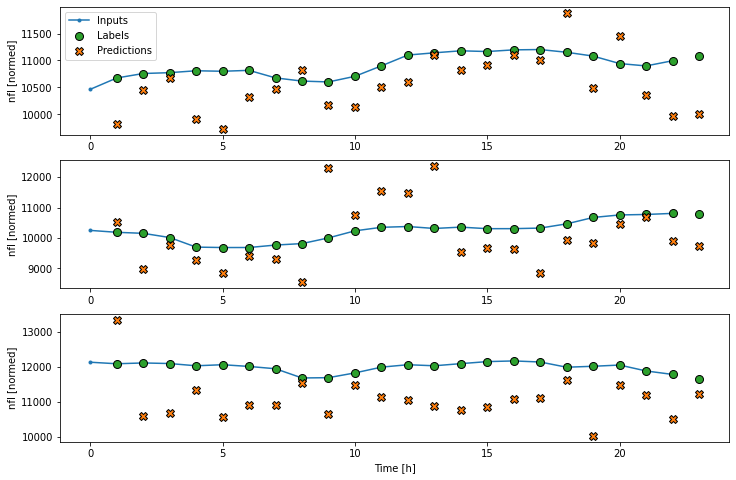

In [ ]:
wide_window.plot(linear)

#### **Dense Model**

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/250
8/8 [==============================] - 1s 47ms/step - loss: 37346304.0000 - mean_absolute_error: 3987.3579 - val_loss: 2285021.5000 - val_mean_absolute_error: 1115.9668
Epoch 2/250
8/8 [==============================] - 0s 16ms/step - loss: 2153531.5000 - mean_absolute_error: 1038.6265 - val_loss: 297255.4375 - val_mean_absolute_error: 370.5561
Epoch 3/250
8/8 [==============================] - 0s 14ms/step - loss: 165415.5469 - mean_absolute_error: 313.4749 - val_loss: 373933.0938 - val_mean_absolute_error: 299.5724
Epoch 4/250
8/8 [==============================] - 0s 15ms/step - loss: 257542.5312 - mean_absolute_error: 237.8954 - val_loss: 149761.5156 - val_mean_absolute_error: 205.7622
Epoch 5/250
8/8 [==============================] - 0s 20ms/step - loss: 72874.0938 - mean_absolute_error: 166.9750 - val_loss: 57268.3008 - val_mean_absolute_error: 199.1706
Epoch 6/250
8/8 [==============================] - 0s 14ms/step - loss: 74246.4844 - mean_absolute_error: 165.8425 

#### **Multi Step Dense Model**

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['nfl'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['nfl']

Text(0.5, 1.0, 'Given 3h as input, predict 1h into the future.')

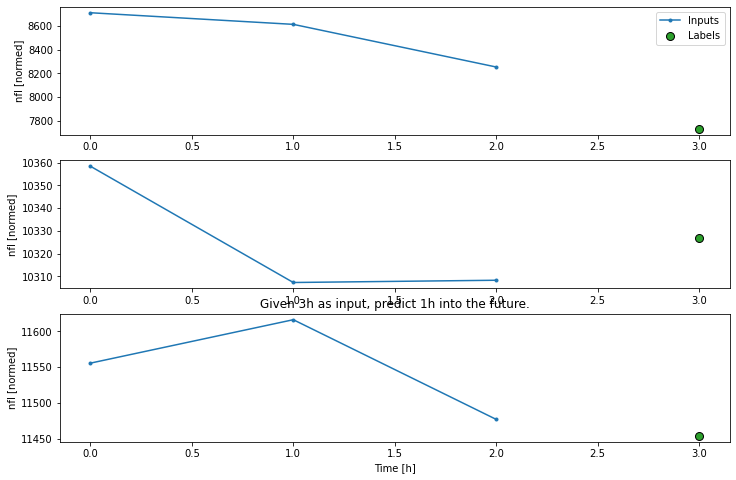

In [ ]:
conv_window.plot()
plt.title("Given 3h as input, predict 1h into the future.")

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=320, activation='relu'),
    tf.keras.layers.Dense(units=640, activation='relu'),
    tf.keras.layers.Dense(units=960, activation='relu'),
    tf.keras.layers.Dense(units=1280, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 24)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

3/3 [==============================] - 0s 7ms/step - loss: 403365.1875 - mean_absolute_error: 540.5795


In [ ]:
print('Input shape:', wide_window.example[0].shape)

Input shape: (32, 23, 24)


#### **Convolutional Neural Network Model**

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=15000,kernel_size=(CONV_WIDTH,),activation='relu'),
    tf.keras.layers.Dense(units=12500, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 24)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

3/3 [==============================] - 1s 245ms/step - loss: 58846.9961 - mean_absolute_error: 205.2146


In [ ]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 23, 24)
Labels shape: (32, 23, 1)
Output shape: (32, 21, 1)


In [ ]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['nfl'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['nfl']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 24)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


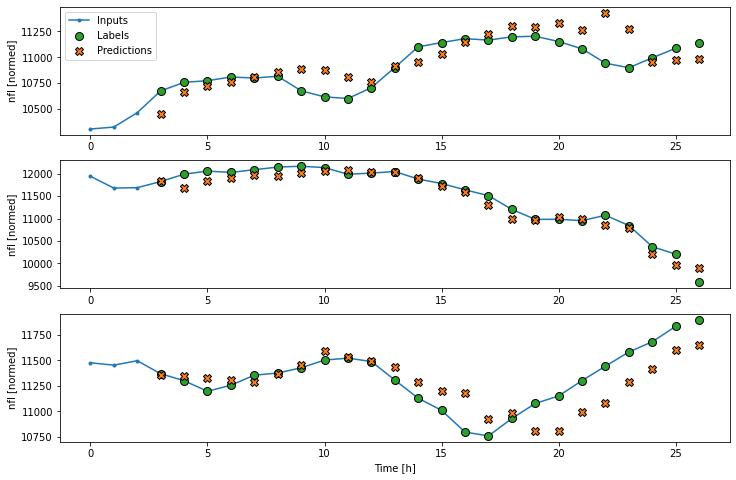

In [ ]:
wide_conv_window.plot(conv_model)

#### **Recurrent neural network Model**

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(96, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(200, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 23, 24)
Output shape: (32, 23, 1)


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 29ms/step - loss: 203905360.0000 - mean_absolute_error: 14275.1953


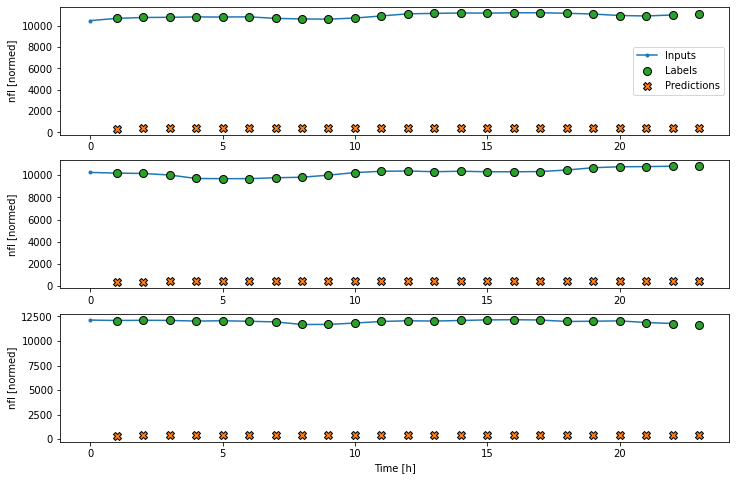

In [ ]:
wide_window.plot(lstm_model)

#### **Model Performance Chart**

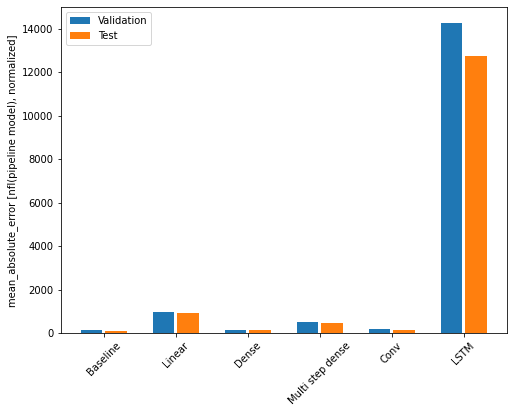

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [nfl(pipeline model), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 95.5033
Linear      : 913.1326
Dense       : 149.5210
Multi step dense: 472.4223
Conv        : 167.3246
LSTM        : 12758.9795


### **Multi-output Time Forecasting models**

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 24)
Labels shape (batch, time, features): (32, 24, 24)


#### **Baseline Model**

In [ ]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 6ms/step - loss: 5652743.0000 - mean_absolute_error: 619.2958


In [ ]:
num_features = train_df.shape[1] 

dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=400, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [ ]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 5ms/step - loss: 2559211.5000 - mean_absolute_error: 573.7133


#### **RNN Model**

In [ ]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

2/2 [==============================] - 0s 8ms/step - loss: 39978088.0000 - mean_absolute_error: 3265.4871

CPU times: user 58.9 s, sys: 4.04 s, total: 1min 2s
Wall time: 1min 4s


### **Model Performance Chart**

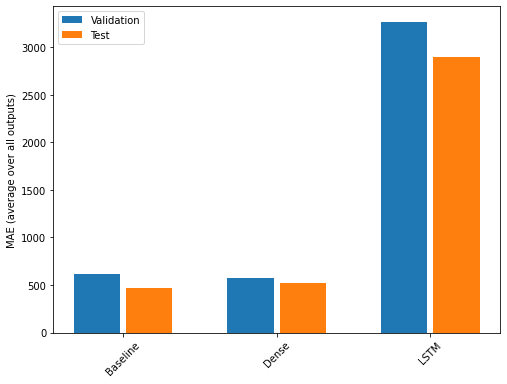

In [ ]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 463.8293
Dense          : 522.1461
LSTM           : 2894.2725


### **Multi-step models**

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

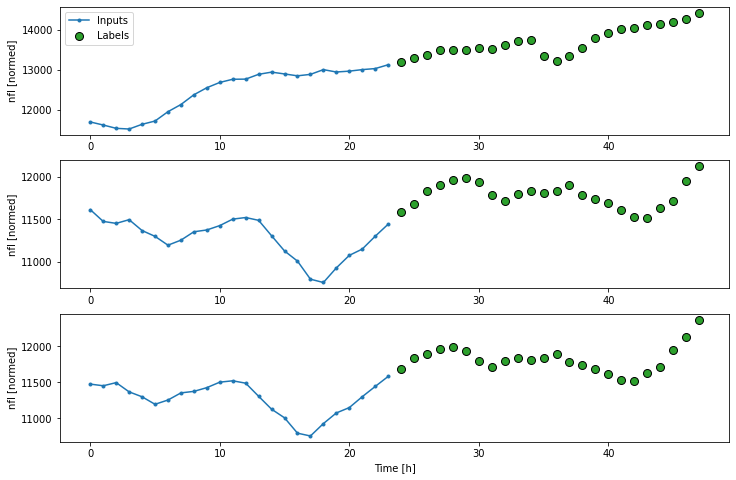

In [ ]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

#### **Baseline Model**

1/1 [==============================] - 0s 105ms/step - loss: 6895754.0000 - mean_absolute_error: 734.4067


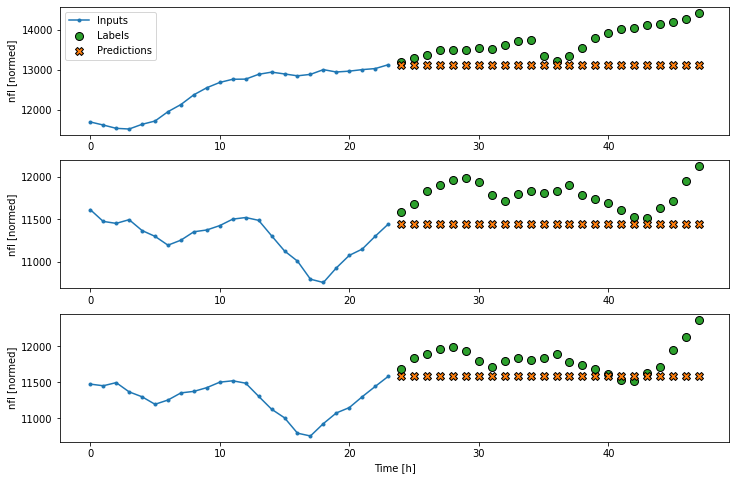

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

1/1 [==============================] - 0s 117ms/step - loss: 6648198.0000 - mean_absolute_error: 734.9977


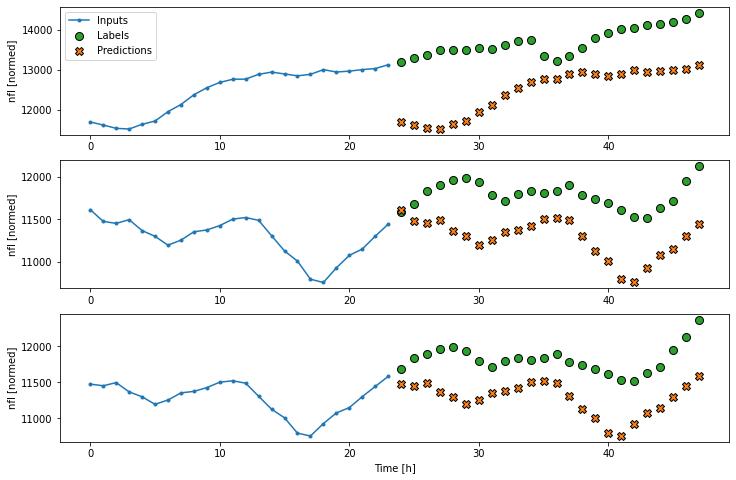

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### **Single-shot models**

#### **Multi Linear Model**

1/1 [==============================] - 0s 44ms/step - loss: 2349008.7500 - mean_absolute_error: 667.0201


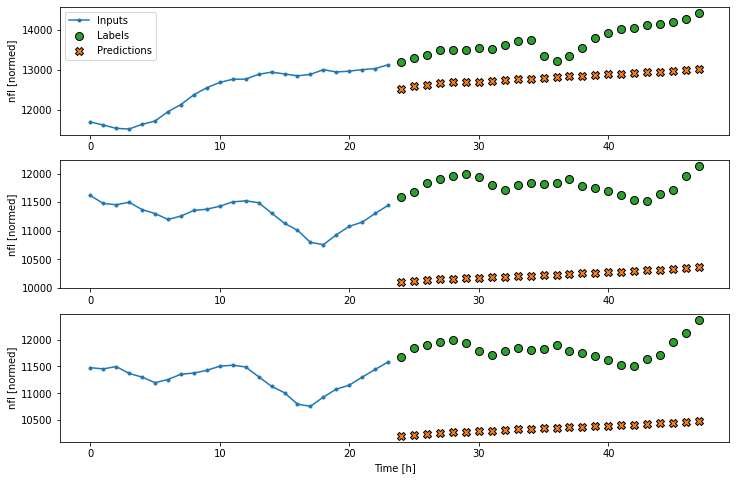

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

#### **Dense Model**

1/1 [==============================] - 0s 46ms/step - loss: 2162179.2500 - mean_absolute_error: 623.5437


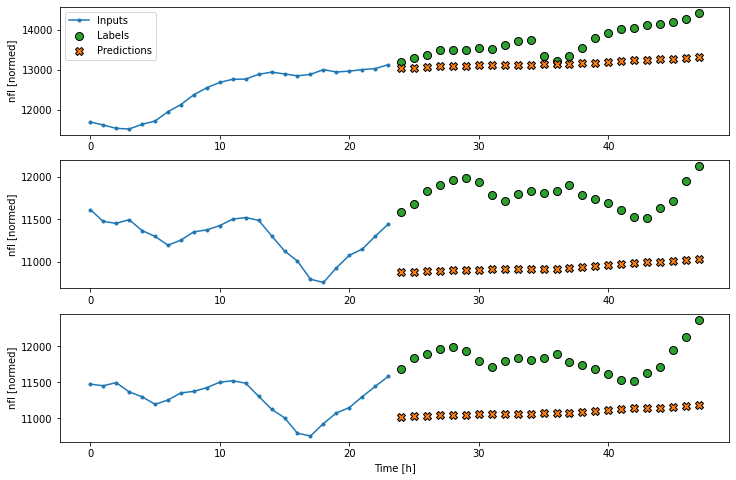

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

#### **CNN Model**

1/1 [==============================] - 0s 44ms/step - loss: 2185511.5000 - mean_absolute_error: 621.7165


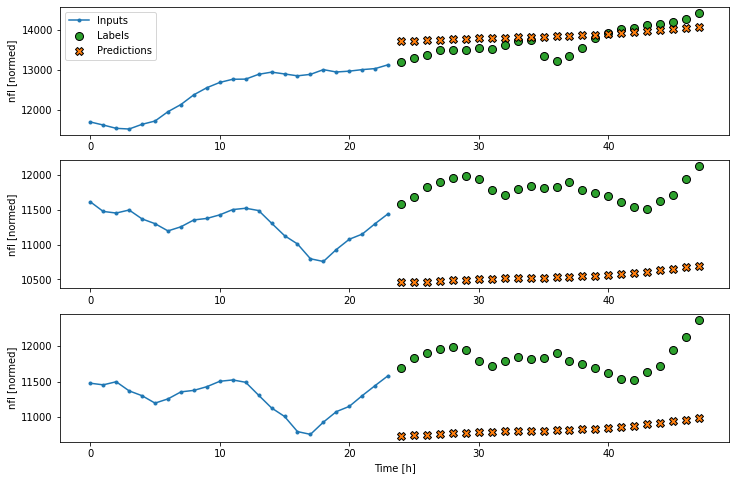

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

#### **RNN Model**

1/1 [==============================] - 0s 46ms/step - loss: 37052976.0000 - mean_absolute_error: 3162.8716


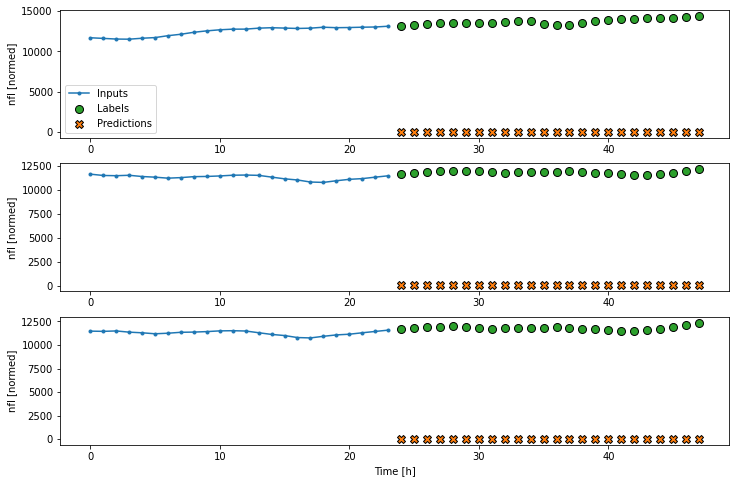

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### **Autoregressive model**

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 24])

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 24)


1/1 [==============================] - 0s 49ms/step - loss: 36856904.0000 - mean_absolute_error: 3151.9631


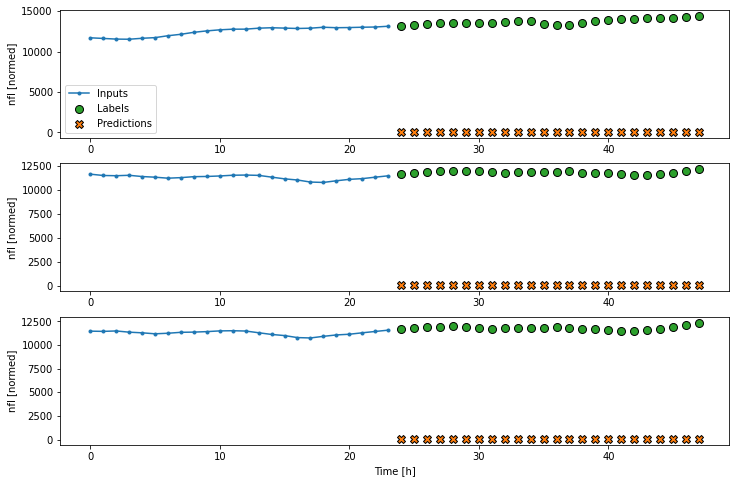

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

### **Model Performance Chart**


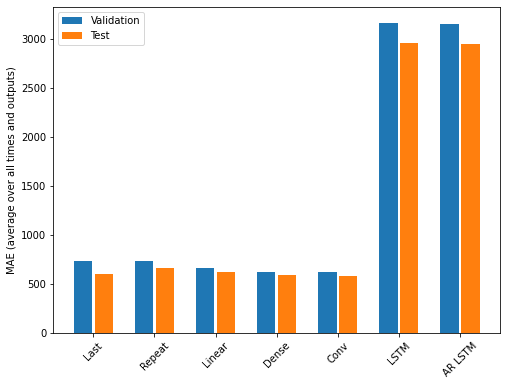

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 597.2555
Repeat  : 658.6808
Linear  : 623.8972
Dense   : 587.8914
Conv    : 585.2911
LSTM    : 2956.6975
AR LSTM : 2945.0483


**This would be the results for forecasting the NFL column using the same**

**Conclusion of independent Model Analysis: Here we can conclude that due to the fact the mae values of all algorithms are considerably high hence they are not suitable to be impolemented with practical datasets, this high values of mae is due to the fact that scaling of values is not present , hence i have done th esame and recorded the outputs in a seperate colab notebook , link has been enclosed below kindly do check**

Link: https://colab.research.google.com/drive/1RfKKGVFcUsk0aUHNIYEArQfW6cDXLsKZ?usp=sharing

Note: this loss is due to the fact that data set is regession based and mainly due to the fact that values arent scaled properly in dataset**

**Queries at this stage:**

**1) Suppose if i increase the number of epochs can any visual differnec eb noticed in terms of mae reduction?**

**A) No sir , i have tried with 10 million epochs and the same mae values  are being recorded maybe we can see expect a small change of values sir**

## **Overall Conclusion:**


**1) The above algorithms, cannot be implemented with the un scaled dataset directly,due to the fact that algoriths loss , mae values would skyrocket and hence it would be advisable to scale the values and then perform the analysis,although certain models do help with the same , but the options would be limited hence after performing scaling and testing the same , we would have many models with which we can choose from sir**

**2) Based on  dependent model analysis and independent model analysis ,the algorithms under the category of independent analysis perform slighlty better than dependent analysis, also i would like to point out that in both the algorithms the lowest mae/loss was recorded by the dense and convolution networks hence either of them could be choosen  by user based on user's preference / requirements sir, if the user prefers to implement their version fo the algorithm without scaling sir**


Thank you